# Rainfall Weather Forecasting

# Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. 

Here, predict two things:

1. Problem Statement: 
    
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
    
Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Our data set
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Exploratory Data Analysis (EDA)

In [3]:
# Check the dimension of our DataSet
data.shape

(8425, 23)

In [4]:
#Let us check the name of our columns
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
# Check the data types of our 
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

So we have 16 Numeric datatypes and 7 Object type data types

In [6]:
# Check the info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

There are many columns of null values

In [7]:
# Check the null value counts
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

From above there are almost all fielsds have null values; we will remove by imputation technique

In [8]:
# Let us fund the Unique values present in our data
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
#Now Check any duplicate data present or not, If present then we will drop them.
data=data.drop_duplicates()

In [10]:
data.shape

(6762, 23)

In [11]:
# Statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6692.0,13.109145,5.569574,-2.0,9.0,13.2,17.5,28.5
MaxTemp,6705.0,24.098345,6.156128,8.2,19.5,23.5,28.4,45.5
Rainfall,6624.0,2.780148,10.591418,0.0,0.0,0.0,0.8,371.0
Evaporation,3841.0,5.302395,4.436790,0.0,2.6,4.6,7.0,145.0
Sunshine,3526.0,7.890896,3.785883,0.0,5.4,9.0,10.8,13.9
WindGustSpeed,5820.0,38.977663,14.418577,7.0,30.0,37.0,48.0,107.0
WindSpeed9am,6699.0,12.782206,9.833499,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6662.0,17.571150,9.620043,0.0,9.0,17.0,24.0,83.0
Humidity9am,6708.0,67.506559,17.251733,10.0,56.0,68.0,81.0,100.0
Humidity3pm,6666.0,50.467147,18.631086,6.0,38.0,50.0,63.0,99.0


In [12]:
#Data Processing
#Now Let us find the values of each Features 
for i in data.columns:
        print(data[i].value_counts())
        print('-'*100)

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
----------------------------------------------------------------------------------------------------
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
----------------------------------------------------------------------------------------------------
13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64
----------------------------------------------------------------------------------------------------
19.0    66
19.8    62
20.8    54
23.8  

We can notice that there is no spacial character or space in between features.
Also we noticed same number of values in RainToday and RainTomorrow.

Let us check if they are same, if same we can remove one columns

In [13]:
if data['RainToday'].equals(data['RainTomorrow']):
    print ('Same Data')
else:
    print("Different Data")

Different Data


They are different, so we can proceed

In [14]:
#Now We will convert date from object type to date type and then seperate day, month and year
data['Date']=pd.to_datetime(data['Date'])
data["Day"] = data['Date'].dt.day
data["Month"] = data['Date'].dt.month
data["Year"] = data['Date'].dt.year

In [15]:
# Now drop date coloumns from our data
data.drop("Date",axis=1,inplace=True)

In [16]:
#As we removed around 1663 records let us check again null value sum
data.isnull().sum()

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Day                 0
Month               0
Year                0
dtype: int64

the number has reduced much

In [17]:
# Let us separate Numercial and Catagorical features
# Checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Now checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Categorical columns are:
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Numerical columns are:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [18]:
# Now let us replace the NAN values in Other catagorical Coloumns by MODE 

df=pd.DataFrame()
df['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
df['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
df['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
df['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])
df['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])
df['Location']=data['Location']

In [19]:
df

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Location
0,W,W,WNW,No,No,Albury
1,WNW,NNW,WSW,No,No,Albury
2,WSW,W,WSW,No,No,Albury
3,NE,SE,E,No,No,Albury
4,W,ENE,NW,No,No,Albury
...,...,...,...,...,...,...
8420,E,SE,ENE,No,No,Uluru
8421,NNW,SE,N,No,No,Uluru
8422,N,SE,WNW,No,No,Uluru
8423,SE,SSE,N,No,No,Uluru


In [20]:
#Now impute values to other fields using this feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [21]:
# We can impute values to our numerical columns by using Iterative imputers
itimp=IterativeImputer()
befor_imp=pd.DataFrame(data[numerical_col])

In [22]:
kk_df=pd.DataFrame(itimp.fit_transform(befor_imp),columns=numerical_col)
kk_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.900000,0.6,3.391685,7.130509,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.874826,16.9,21.8,1.0,12.0,2008.0
1,7.4,25.100000,0.0,4.149341,12.628322,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,1.135447,1.451345,17.2,24.3,2.0,12.0,2008.0
2,12.9,25.700000,0.0,5.872974,12.022633,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,2.268447,2.000000,21.0,23.2,3.0,12.0,2008.0
3,9.2,28.000000,0.0,3.771469,13.091641,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,0.505052,0.825362,18.1,26.5,4.0,12.0,2008.0
4,17.5,32.300000,1.0,3.909425,6.732299,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,2.8,23.400000,0.0,6.351080,11.113943,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,0.685550,1.589567,10.1,22.4,21.0,6.0,2017.0
6758,3.6,25.300000,0.0,6.025810,11.780452,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,0.577039,1.130006,10.9,24.5,22.0,6.0,2017.0
6759,5.4,26.900000,0.0,7.826086,11.551481,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,0.869720,1.639326,12.5,26.1,23.0,6.0,2017.0
6760,7.8,27.000000,0.0,8.048489,10.572988,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,24.0,6.0,2017.0


In [23]:
df[numerical_col]=kk_df[numerical_col]

In [24]:
df.shape

(6762, 25)

In [25]:
df.isna().sum()

WindGustDir         0
WindDir9am          0
WindDir3pm          0
RainToday           0
RainTomorrow        0
Location            0
MinTemp          1663
MaxTemp          1663
Rainfall         1663
Evaporation      1663
Sunshine         1663
WindGustSpeed    1663
WindSpeed9am     1663
WindSpeed3pm     1663
Humidity9am      1663
Humidity3pm      1663
Pressure9am      1663
Pressure3pm      1663
Cloud9am         1663
Cloud3pm         1663
Temp9am          1663
Temp3pm          1663
Day              1663
Month            1663
Year             1663
dtype: int64

In [26]:
df.dropna(inplace=True)
df.shape

(5099, 25)

we have removed all null values from our data

<Axes: >

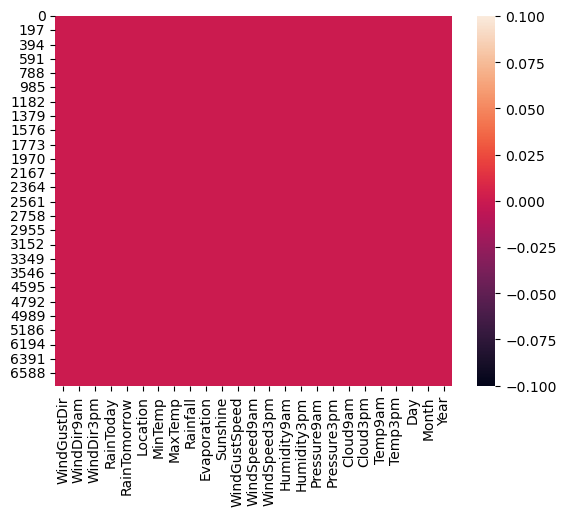

In [27]:
# Visualization
sns.heatmap(df.isna())

In [28]:
#1st Univarient analisys
categorical_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [32]:
sns.countplot(df['Location'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

ValueError: Cannot use `hue` without `x` and `y`

We can notice that we have maximum features from ALbury low data from wollongong

In [29]:
print(df['WindGustDir'].value_counts())
sns.countplot(df['WindGustDir'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

E      1143
N       372
SSE     364
W       333
S       326
WNW     322
SE      302
SW      287
WSW     261
NNE     239
NE      237
SSW     216
ENE     210
NW      195
ESE     162
NNW     130
Name: WindGustDir, dtype: int64


ValueError: Cannot use `hue` without `x` and `y`

From This we can notice that if wind direction is in East direction the the chances of Rain is very low, All other the cances is almost same

In [30]:
print(df['WindDir9am'].value_counts())
sns.countplot(df['WindDir9am'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

N      1235
SW      539
NW      433
WSW     351
SE      322
SSW     291
W       262
WNW     258
S       236
SSE     234
NE      203
NNW     169
NNE     166
E       138
ESE     136
ENE     126
Name: WindDir9am, dtype: int64


ValueError: Cannot use `hue` without `x` and `y`

For we can notice that if wind direction at 9 am is towards north direction then the chances of Rain is Low

In [ ]:
print(df['WindDir3pm'].value_counts())
sns.countplot(df['WindDir3pm'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

In this case if the Wind direction is towards South East then the chances of Rain is low

In [33]:
#Numerical Data
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

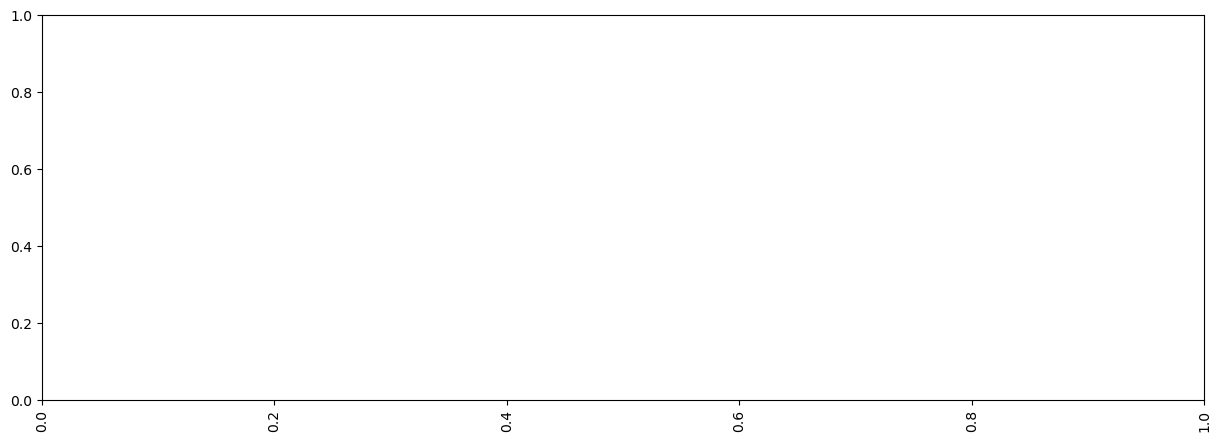

In [34]:
#Let us find the fainfall at different location
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.lineplot(df['Location'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

From this we can notice that At coffsHarbour the rain fall is comparetevily high, But chances of rain tommorow is at Wollongong or Melbourne is low

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

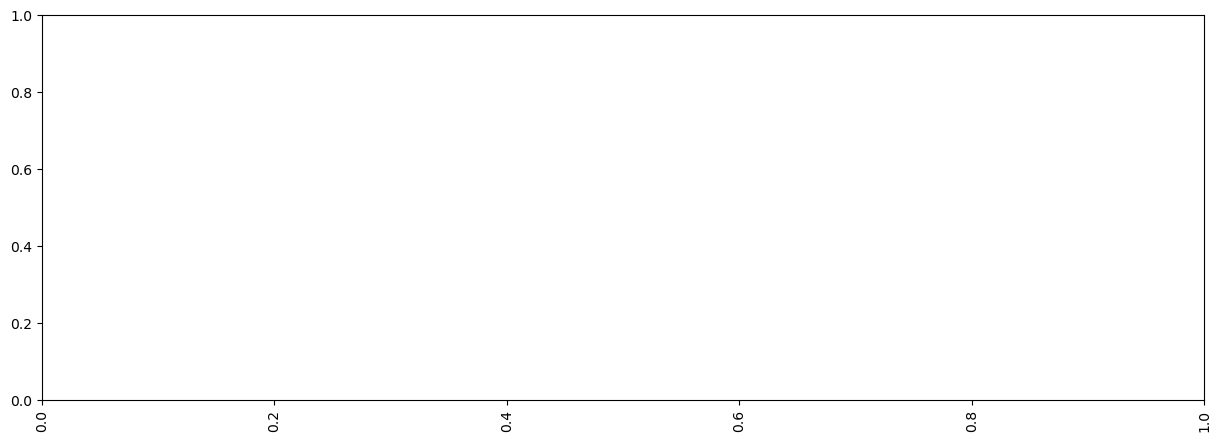

In [35]:
#Let us find the fainfall at minimum Temperature
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['MinTemp'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

High rain fall in temperature of 10 to 25

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

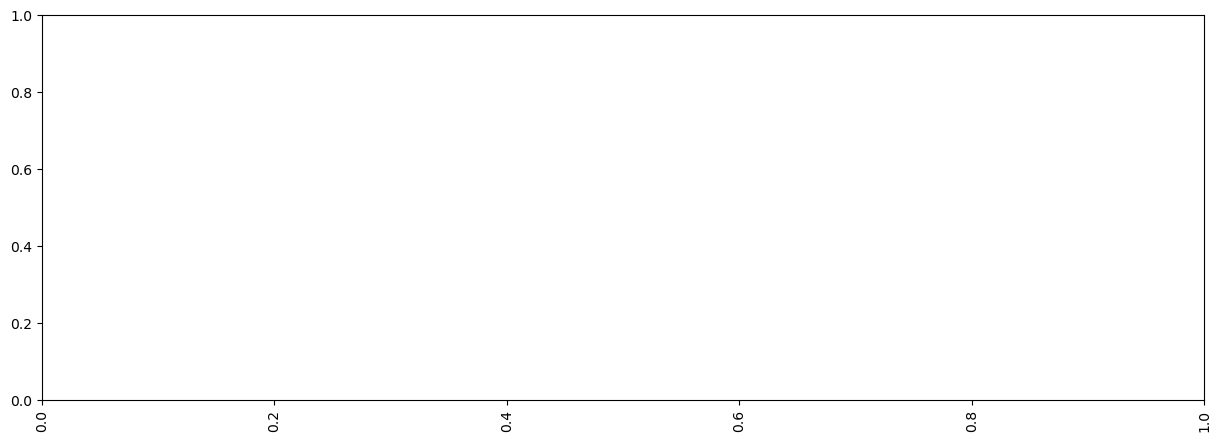

In [36]:
#Let us find the rainfall at Max Temperature
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['MaxTemp'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

If the Maximum temperature is in between 15 to 30 then the rainfall is high

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

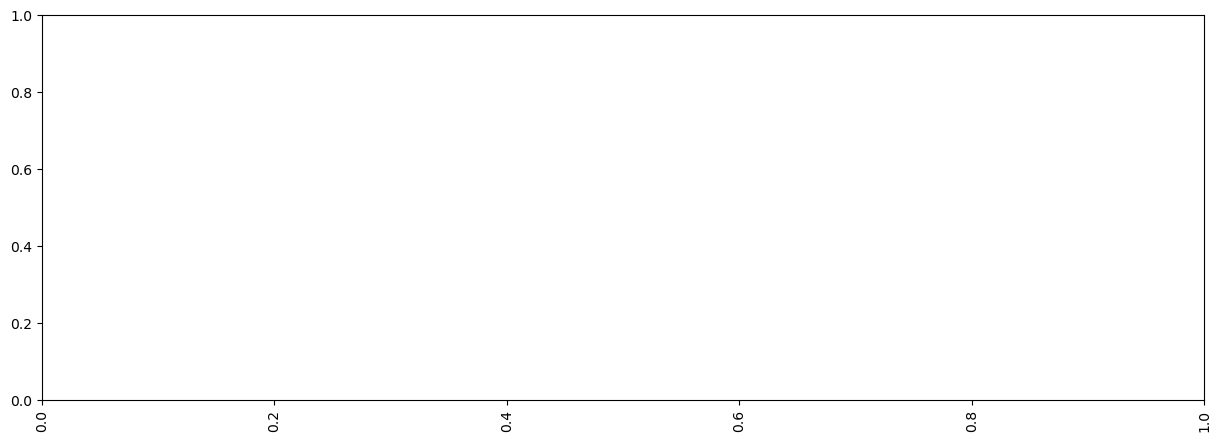

In [37]:
#Let us find the rainfall at Evaporation
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['Evaporation'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

In [ ]:
From this we can reasily identify some outliers are present, and high rain fall during evapuration at 20 to 30, and chances of Raining Tomorrow is also high during same rate

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

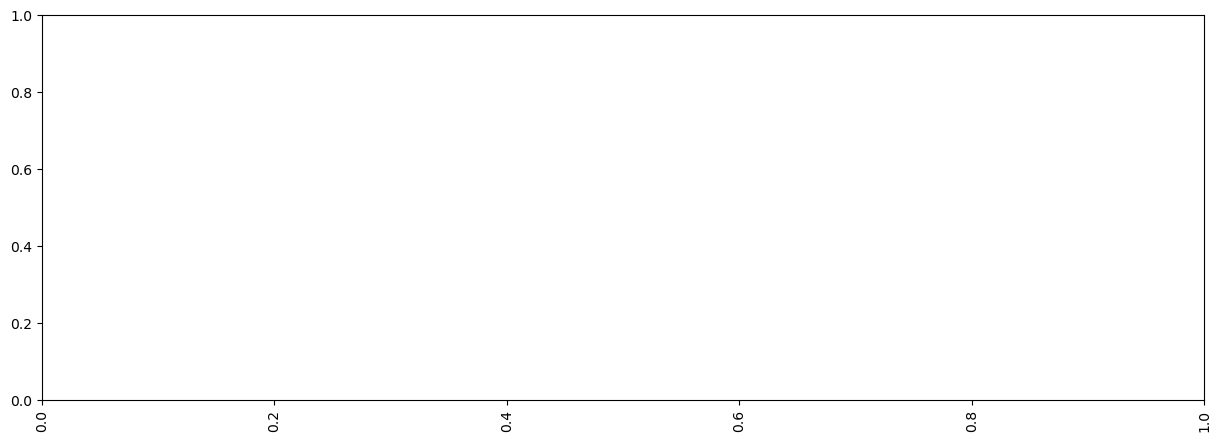

In [38]:
#Let us find the rainfall at Sunshine
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['Sunshine'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

As Sunshine increases rain fall decreases, but IF sunshine is very high some chances of rain fall is there

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

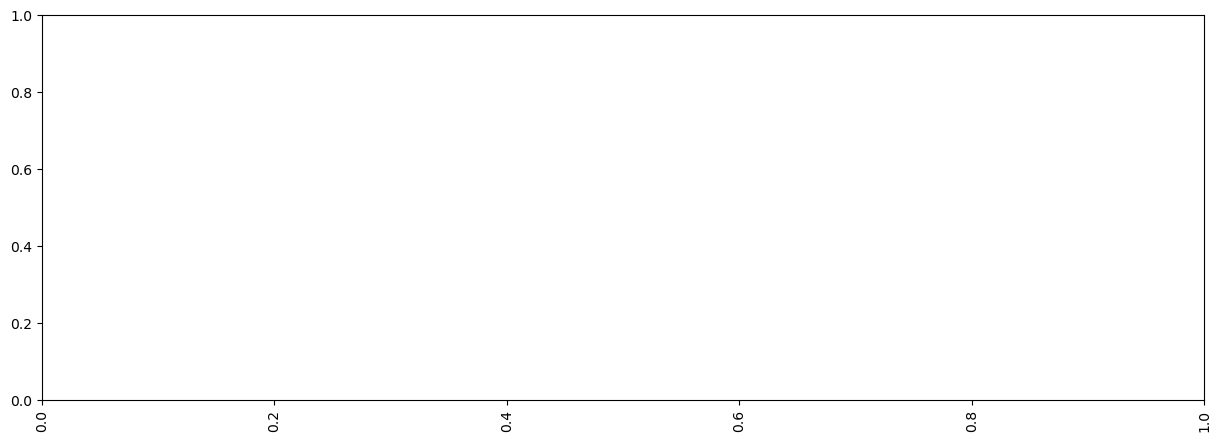

In [39]:
#Let us find the rainfall at WindGustSpeed
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindGustSpeed'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

Rain fall is in between 20 to 80 windgustspeed

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

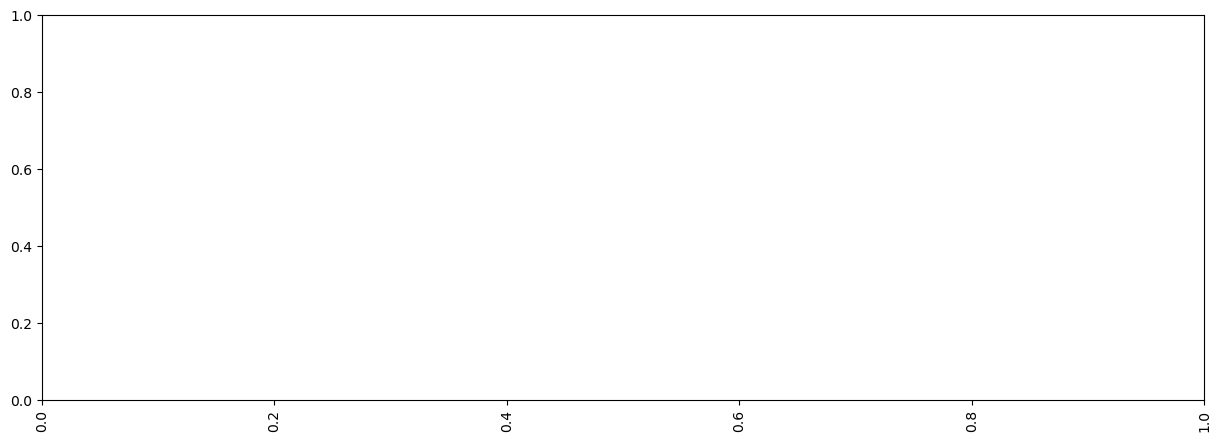

In [40]:
#Let us find the rainfall at Windspeed3pm
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindSpeed3pm'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

If wind speed 0 to 40 at noon then chances of Rainfall is high

In [ ]:
#Let us find the rainfall at WindSpeed9am
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindSpeed9am'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

In [ ]:
If in morning there is wind then chances rain is high

In [ ]:
#Check is there any relation between windspeed9am with windspeed3pm
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindSpeed9am'],df['WindSpeed3pm'],hue=df['RainTomorrow'])
plt.show()

In [ ]:
This Shows there is a linear relation

In [ ]:
#Let us find the Windgustspeed at WindSpeed9am
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindSpeed9am'],df['WindGustSpeed'],hue=df['RainTomorrow'])
plt.show()

In [ ]:
Also have some linear relation

In [ ]:
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between Humidity9am Rain_Fall')
sns.scatterplot(df['Humidity9am'],df['Rainfall'],hue=df['RainTomorrow'])

plt.subplot(2,2,2)
plt.title('Comparision between Humidity3pm and Rainfall')
sns.scatterplot(df['Humidity3pm'],df['Rainfall'],hue=df['RainTomorrow'])

plt.subplot(2,2,3)
plt.title('Comparision between Pressure9am and Rainfall')
sns.scatterplot(df['Pressure9am'],df['Rainfall'],hue=df['RainTomorrow'])

plt.subplot(2,2,4)
plt.title('Comparision between Pressure3pm and Rainfall')
sns.scatterplot(df['Pressure3pm'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

In [ ]:
We can notice if high Humidity is there then chaces of rain fall is high From Fig 3 &4 we can notice that at pressure in between 1000 to 1030 chances of rain fall is high

In [ ]:
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between Cloud9am Rain_Fall')
sns.scatterplot(df['Cloud9am'],df['Rainfall'],hue=df['RainTomorrow'])

plt.subplot(2,2,2)
plt.title('Comparision between Cloud3pm and Rainfall')
sns.scatterplot(df['Cloud3pm'],df['Rainfall'],hue=df['RainTomorrow'],palette='hsv')

plt.subplot(2,2,3)
plt.title('Comparision between Pressure9am and Humidity9am')
sns.scatterplot(df['Pressure9am'],df['Humidity9am'],hue=df['RainTomorrow'])

plt.subplot(2,2,4)
plt.title('Comparision between Humidity3pm and Humidity9am')
sns.scatterplot(df['Humidity3pm'],df['Humidity9am'],hue=df['RainTomorrow'],palette='hsv')
plt.show()

In [ ]:
From fig 1 & 2 As cloudy is high chances of rain is also high

From Fig 3 As Pressure increases the humidity alos increasing

Humidity 9am and 3pm have linear relation

In [ ]:
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between WindGustDir & Rain_Fall')
sns.lineplot(df['WindGustDir'],df['Rainfall'],hue=df['RainTomorrow'],palette='coolwarm')

plt.subplot(2,2,2)
plt.title('Comparision between Winddir9am and Rainfall')
sns.lineplot(df['WindDir9am'],df['Rainfall'],hue=df['RainTomorrow'],palette='cool')

plt.subplot(2,2,3)
plt.title('Comparision between WindDir3pm and Rainfall')
sns.lineplot(df['WindDir3pm'],df['Rainfall'],hue=df['RainTomorrow'],palette='spring')

plt.subplot(2,2,4)
plt.title('Comparision between RAinToday and Rainfall')
sns.lineplot(df['RainToday'],df['Rainfall'],hue=df['RainTomorrow'],palette='hsv')
plt.show()

In [ ]:
If windGustdir is from NNW to SW then chances of rainis too high and high rainfall is in that location, if it is in direction SE to E then Chances of rain is low

If Winddir9am is from WSW to NW then chances of rain is High Similarly if winddirat9am is in N to WSW the rain fall will be low

If Winddir3pm W to ESE chances of rain low, nut if it is in ESE to SSW or to S then rainfall willbe high

If rainfall no rainfall today then chances of raining tomorow is high, and vice versa

In [ ]:
sns.pairplot(df,palette='spring',hue='RainTomorrow')
plt.show()

# Conclusion

High relation between rainfall and RainTomorrow.

If it rainToday then Chances of raining tomorrow is less.

Some linear relationships noticed.

We notice Wind Direction have influence on rainfall.

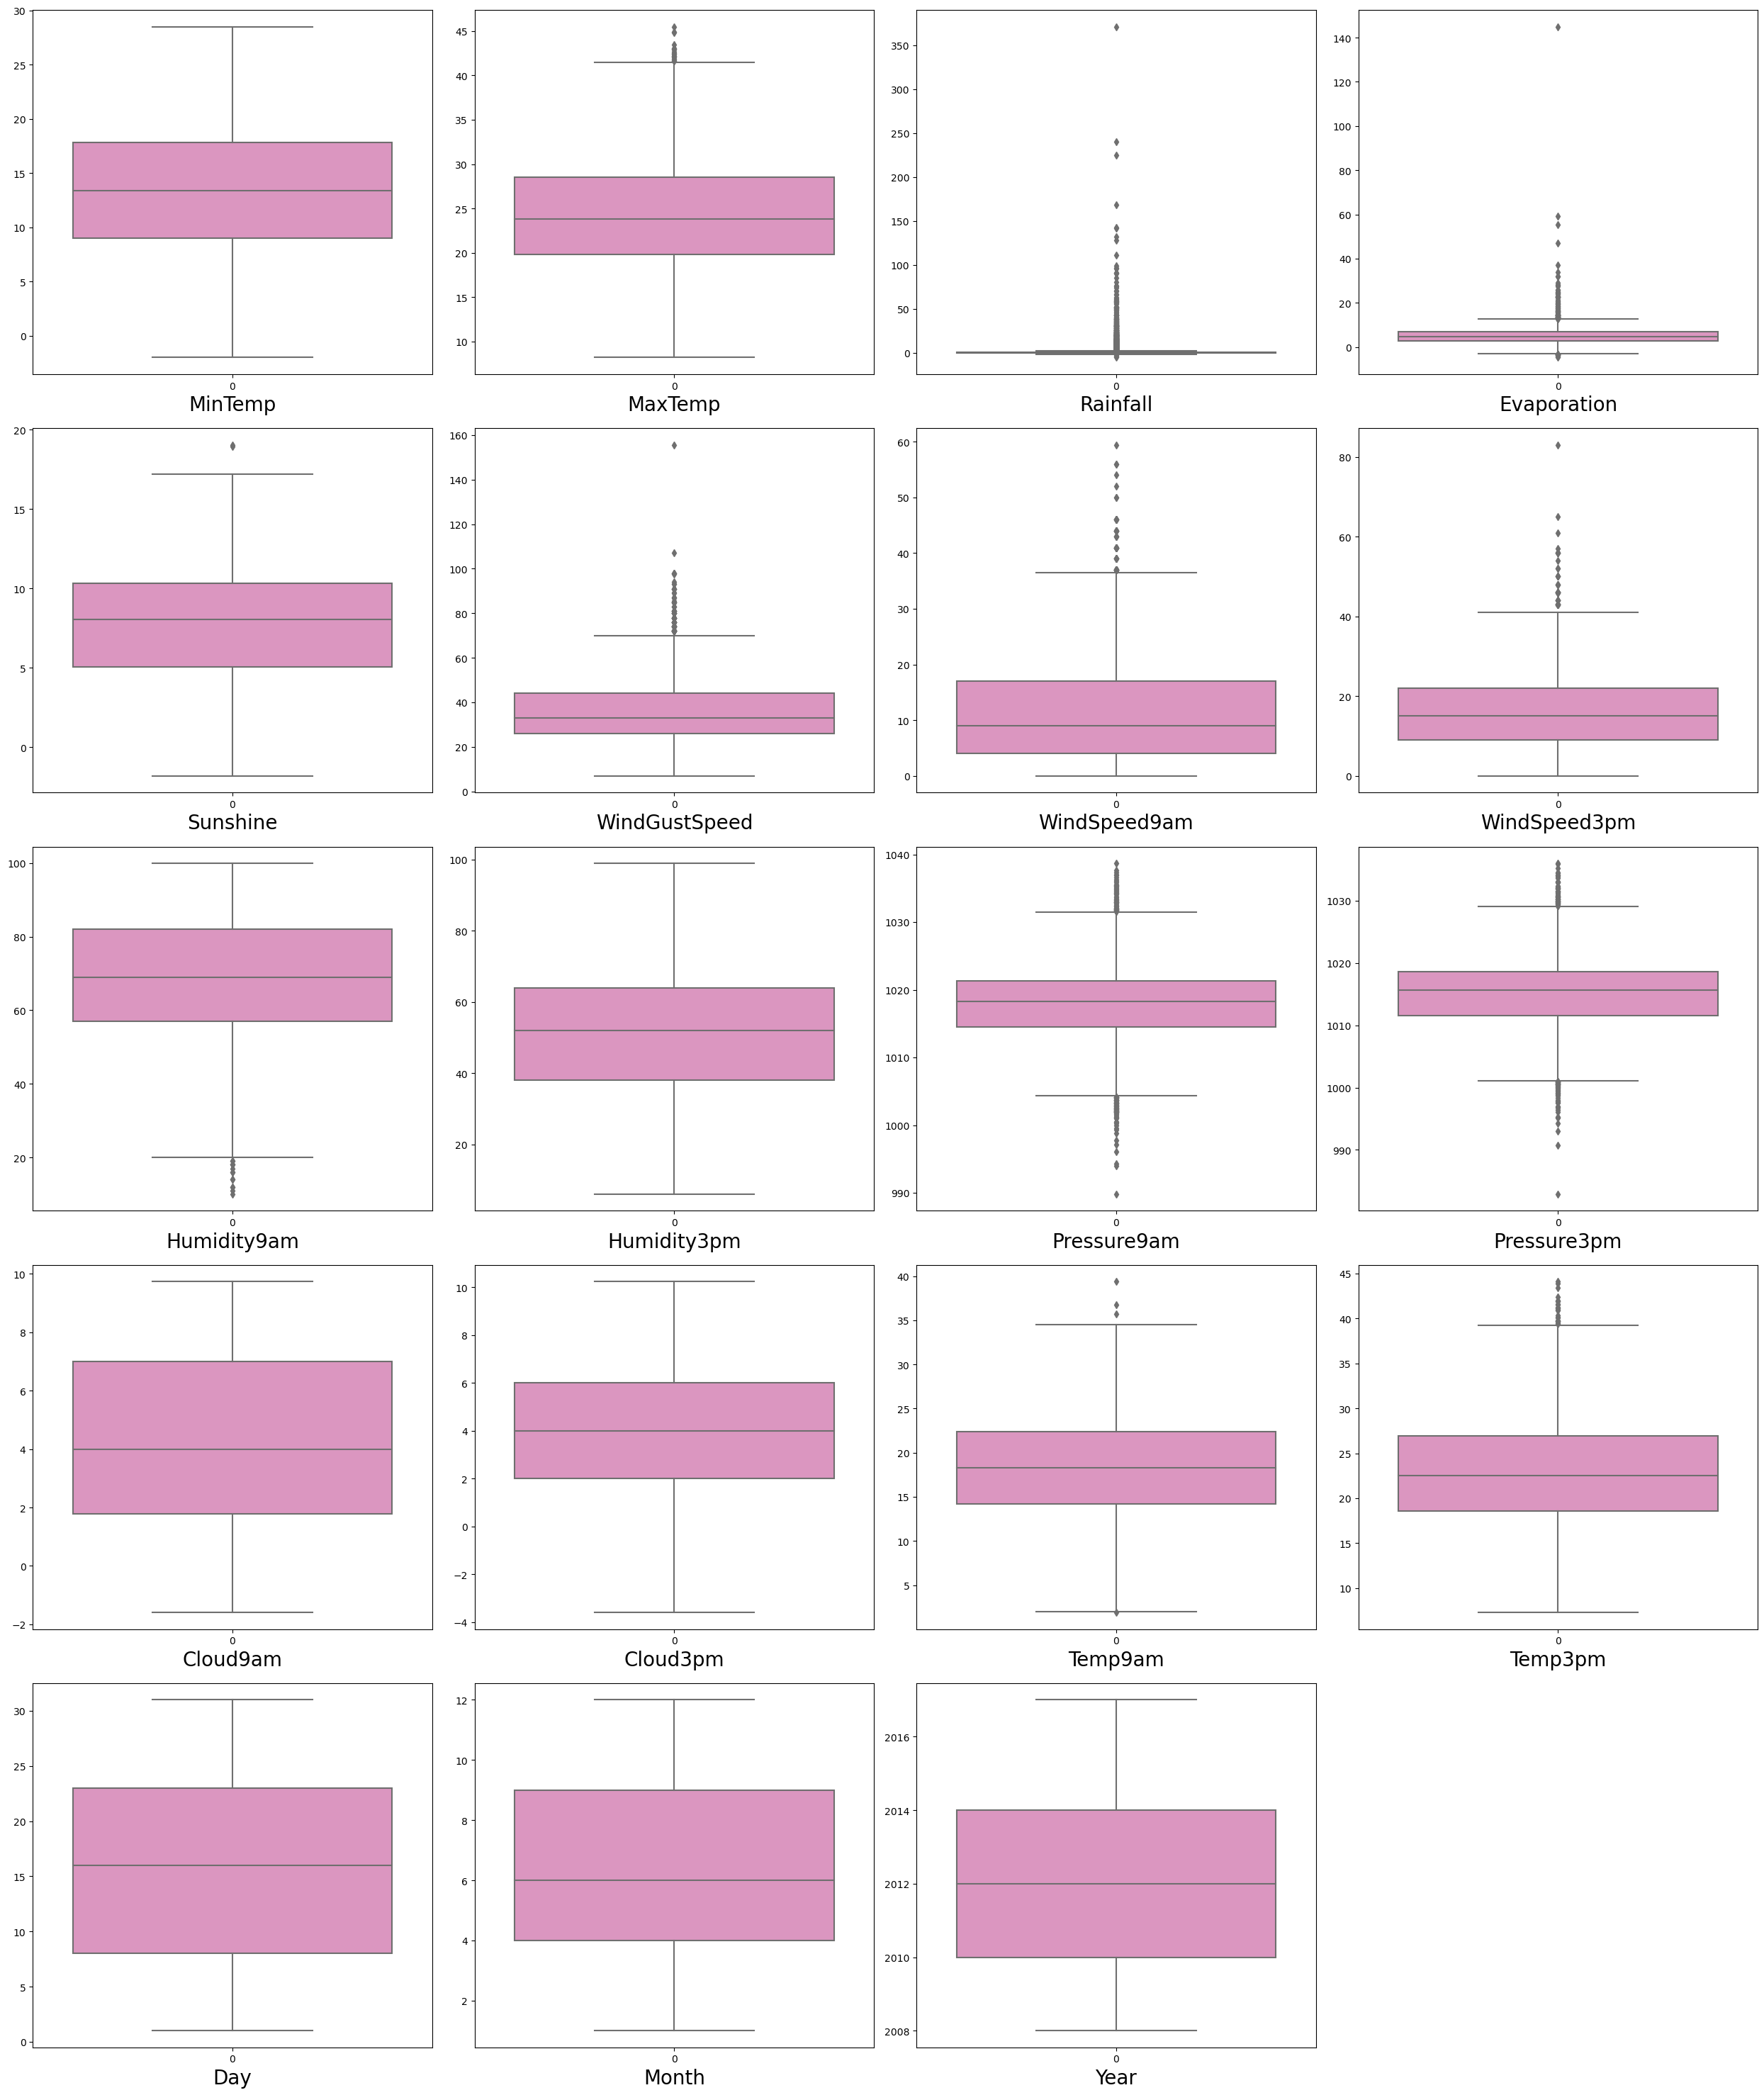

In [42]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Most of the features contains outliers, let us remove the out liners using ZScore method

In [43]:
features=df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z  

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.229987,0.205244,0.398878,0.143002,0.585970,1.015416,0.813279,0.128103,1.766860,1.411133,0.215139,0.187819
1,0.134071,0.257142,0.215776,1.408207,0.585970,0.780844,0.602789,1.443096,1.265458,1.289729,0.162886,0.236069
2,0.233360,0.257142,0.200773,1.237311,0.728578,0.903150,1.023769,1.792251,1.784150,1.133638,0.498993,0.049559
3,0.613966,0.257142,0.307096,1.538932,0.840108,0.005020,0.765395,1.384903,0.055177,0.422557,0.006125,0.609090
4,1.325534,0.170645,0.273756,0.255357,0.372059,0.444045,0.392299,0.768221,1.230878,1.601911,0.058379,1.151667
...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0.147247,0.257142,0.316316,0.980924,0.340981,0.229553,0.554905,1.035748,1.155104,0.878200,1.399554,0.086085
6758,0.167167,0.257142,0.237709,1.168980,0.982716,0.229553,0.765395,0.744785,0.964917,0.670079,1.260211,0.269980
6759,0.431937,0.257142,0.672780,1.104376,0.086843,0.219512,0.765395,0.919363,0.532674,0.271180,0.981525,0.541268
6760,0.448485,0.257142,0.726528,0.828294,0.554892,0.229553,0.975885,1.035748,0.256038,0.219150,0.528661,0.524313


In [44]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Location,MinTemp,MaxTemp,Rainfall,Evaporation,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,W,W,WNW,No,No,Albury,13.4,22.900000,0.6,3.391685,...,22.0,1007.7,1007.1,8.000000,4.874826,16.9,21.8,1.0,12.0,2008.0
1,WNW,NNW,WSW,No,No,Albury,7.4,25.100000,0.0,4.149341,...,25.0,1010.6,1007.8,1.135447,1.451345,17.2,24.3,2.0,12.0,2008.0
2,WSW,W,WSW,No,No,Albury,12.9,25.700000,0.0,5.872974,...,30.0,1007.6,1008.7,2.268447,2.000000,21.0,23.2,3.0,12.0,2008.0
3,NE,SE,E,No,No,Albury,9.2,28.000000,0.0,3.771469,...,16.0,1017.6,1012.8,0.505052,0.825362,18.1,26.5,4.0,12.0,2008.0
4,W,ENE,NW,No,No,Albury,17.5,32.300000,1.0,3.909425,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,N,N,N,No,No,Adelaide,2.8,23.400000,0.0,6.351080,...,24.0,1024.6,1020.3,0.685550,1.589567,10.1,22.4,21.0,6.0,2017.0
6758,WNW,NNE,N,No,Yes,Adelaide,3.6,25.300000,0.0,6.025810,...,21.0,1023.5,1019.1,0.577039,1.130006,10.9,24.5,22.0,6.0,2017.0
6759,WSW,SSW,SW,Yes,Yes,Adelaide,5.4,26.900000,0.0,7.826086,...,24.0,1021.0,1016.8,0.869720,1.639326,12.5,26.1,23.0,6.0,2017.0
6760,WSW,S,W,Yes,No,Adelaide,7.8,27.000000,0.0,8.048489,...,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,24.0,6.0,2017.0


In [45]:
# Total Data Loss 
dataloss=(5099-4789)/5099
dataloss*100

6.079623455579526

Only 6% dat is lost, Let us proceed

# Finding Skewness

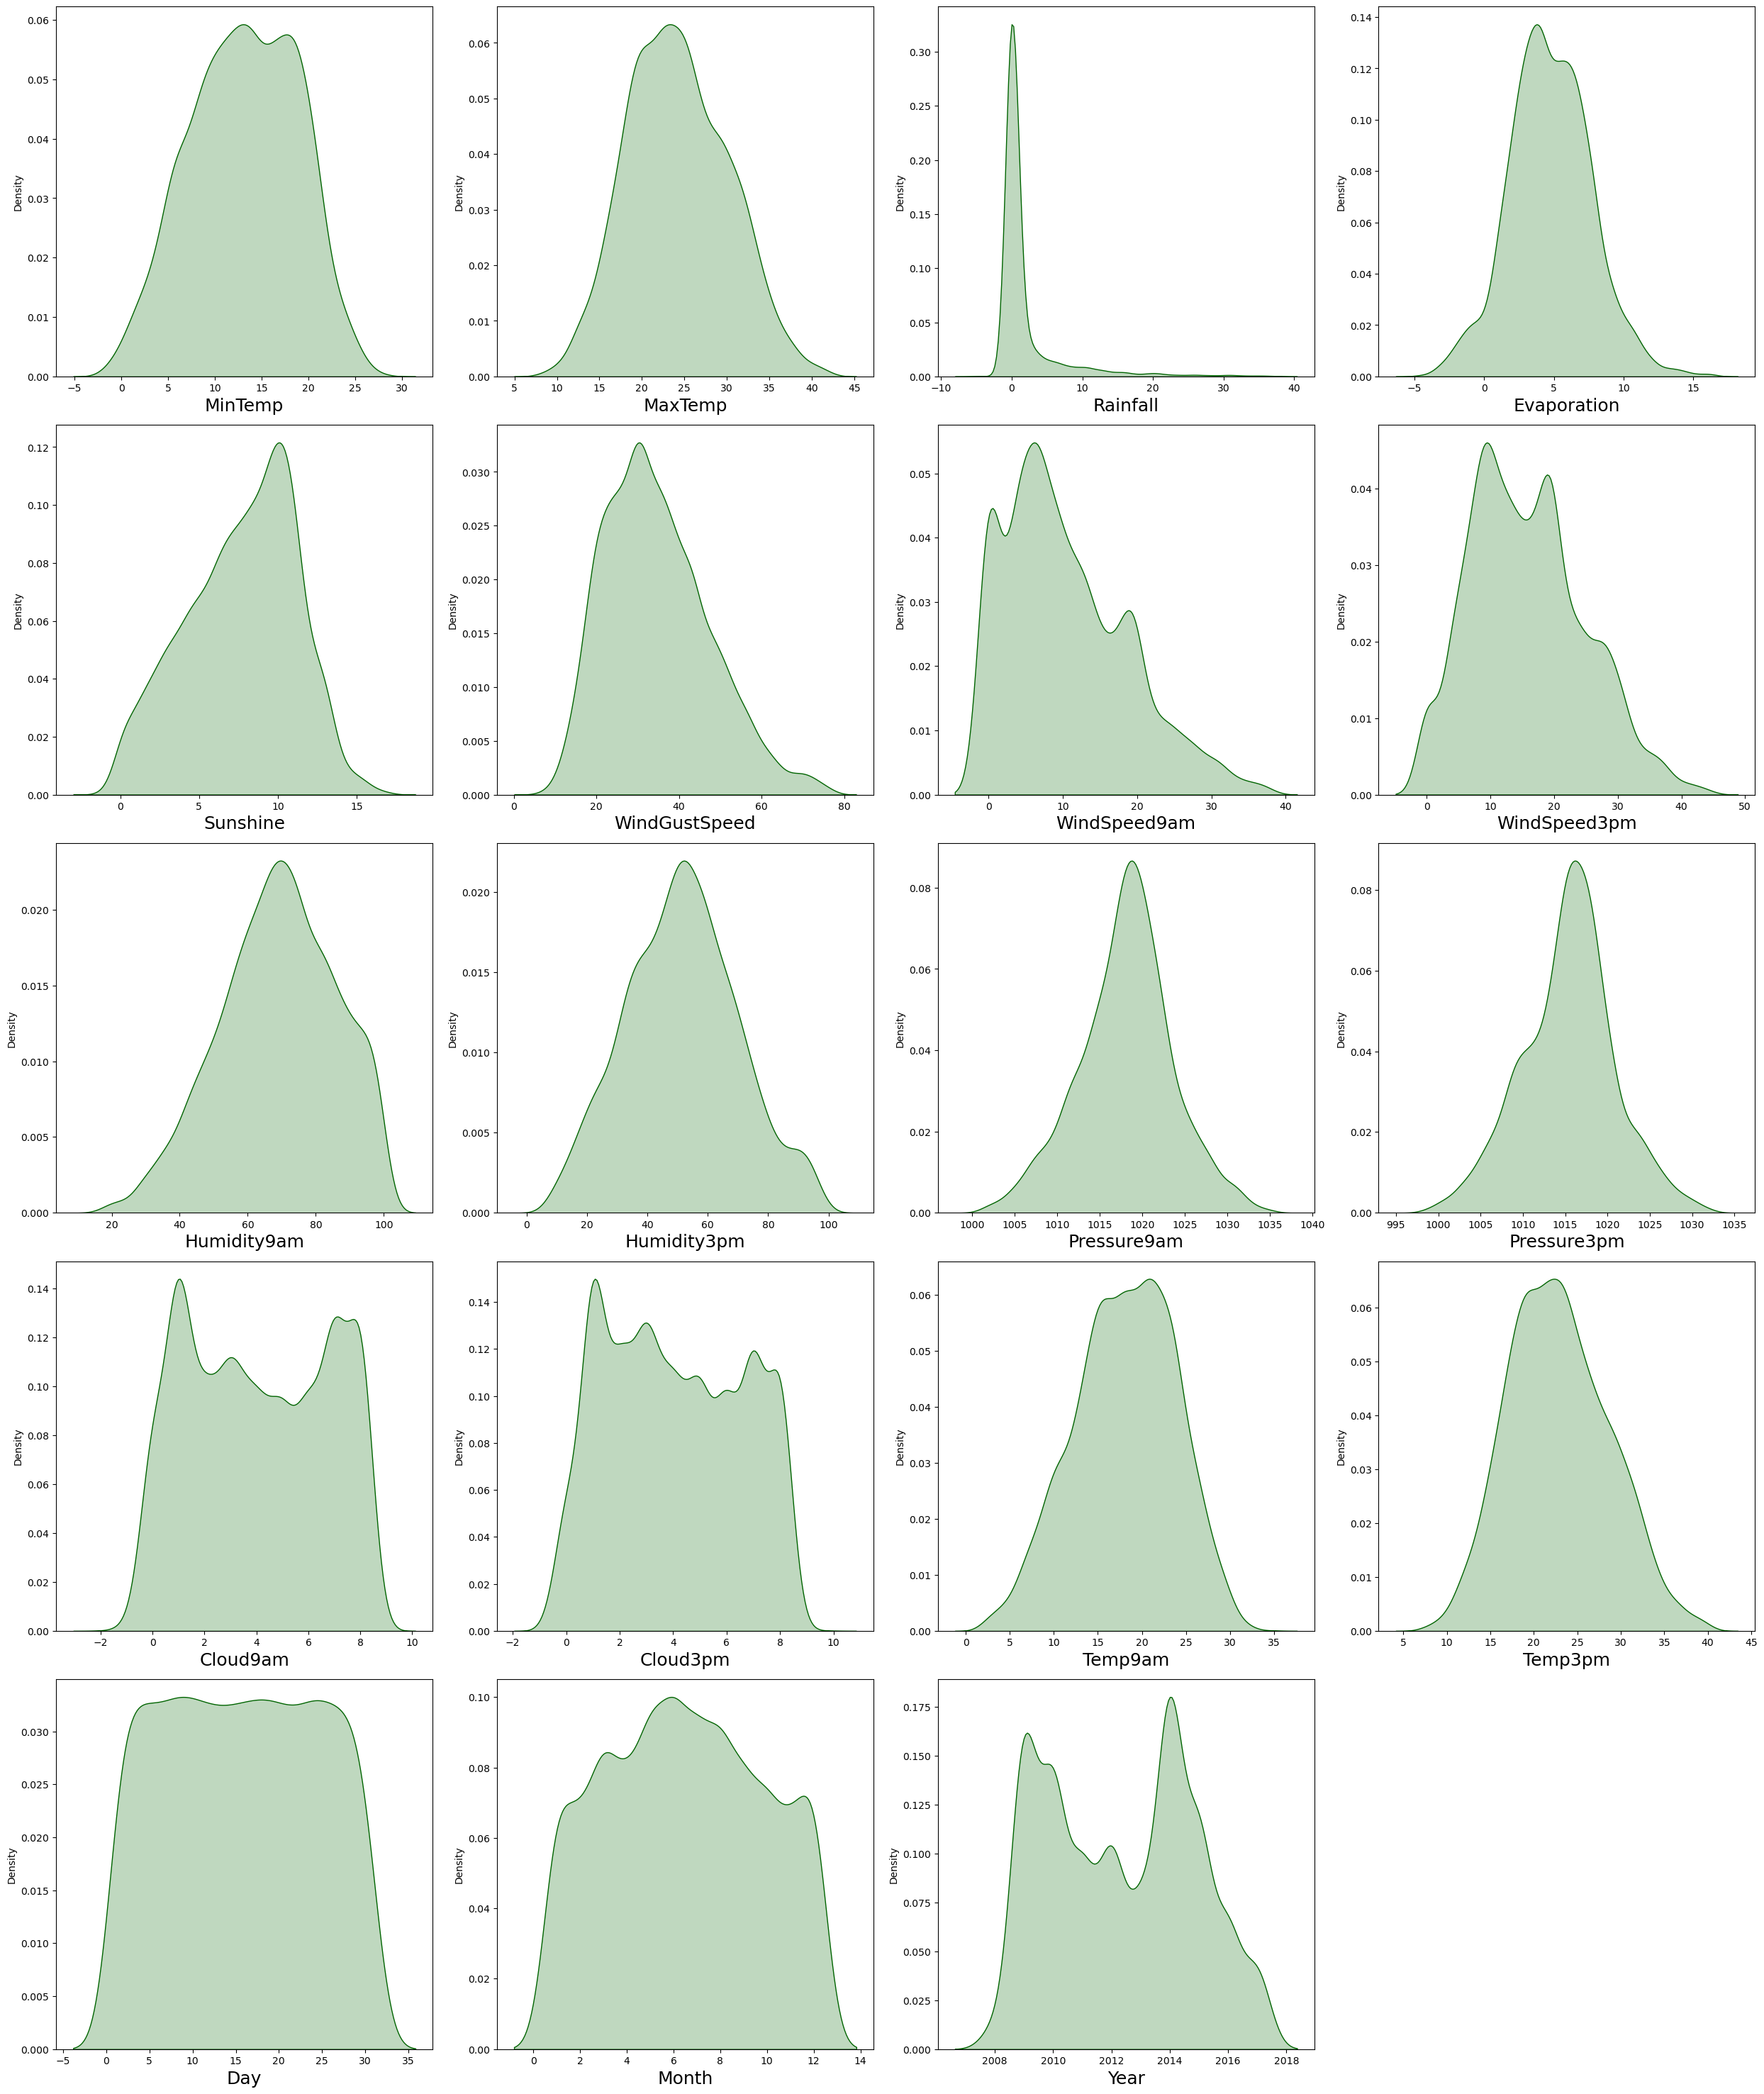

In [47]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(new_df[column],color="darkgreen",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

Few features like rainfall contains high skewness. Let us check using skew()

In [48]:
new_df.skew()

MinTemp         -0.137773
MaxTemp          0.197290
Rainfall         3.650157
Evaporation      0.174545
Sunshine        -0.288996
WindGustSpeed    0.601910
WindSpeed9am     0.756993
WindSpeed3pm     0.426798
Humidity9am     -0.273921
Humidity3pm      0.098996
Pressure9am     -0.109561
Pressure3pm     -0.077155
Cloud9am         0.024393
Cloud3pm         0.096084
Temp9am         -0.209469
Temp3pm          0.243698
Day              0.009663
Month            0.033661
Year             0.083311
dtype: float64

In [49]:
#Removing Skewness using yeo-johnson method

skew=['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm
0,0.048555,-0.449326,0.803420,1.112653,0.930441
1,-0.465737,-0.191372,0.803420,-0.668855,0.738956
2,-0.465737,0.390325,0.934713,1.031915,1.116634
3,-0.465737,-0.319826,-0.826674,0.282632,-0.698347
4,0.281386,-0.272886,0.598279,-0.203514,0.541547


In [50]:
new_df[skew].skew()

Rainfall        -4.981502
Evaporation      0.086263
WindGustSpeed   -0.012794
WindSpeed9am    -0.132963
WindSpeed3pm    -0.077357
dtype: float64

Skewness have been reduced, We can notice Rainfall is one of our Label so we can proceed

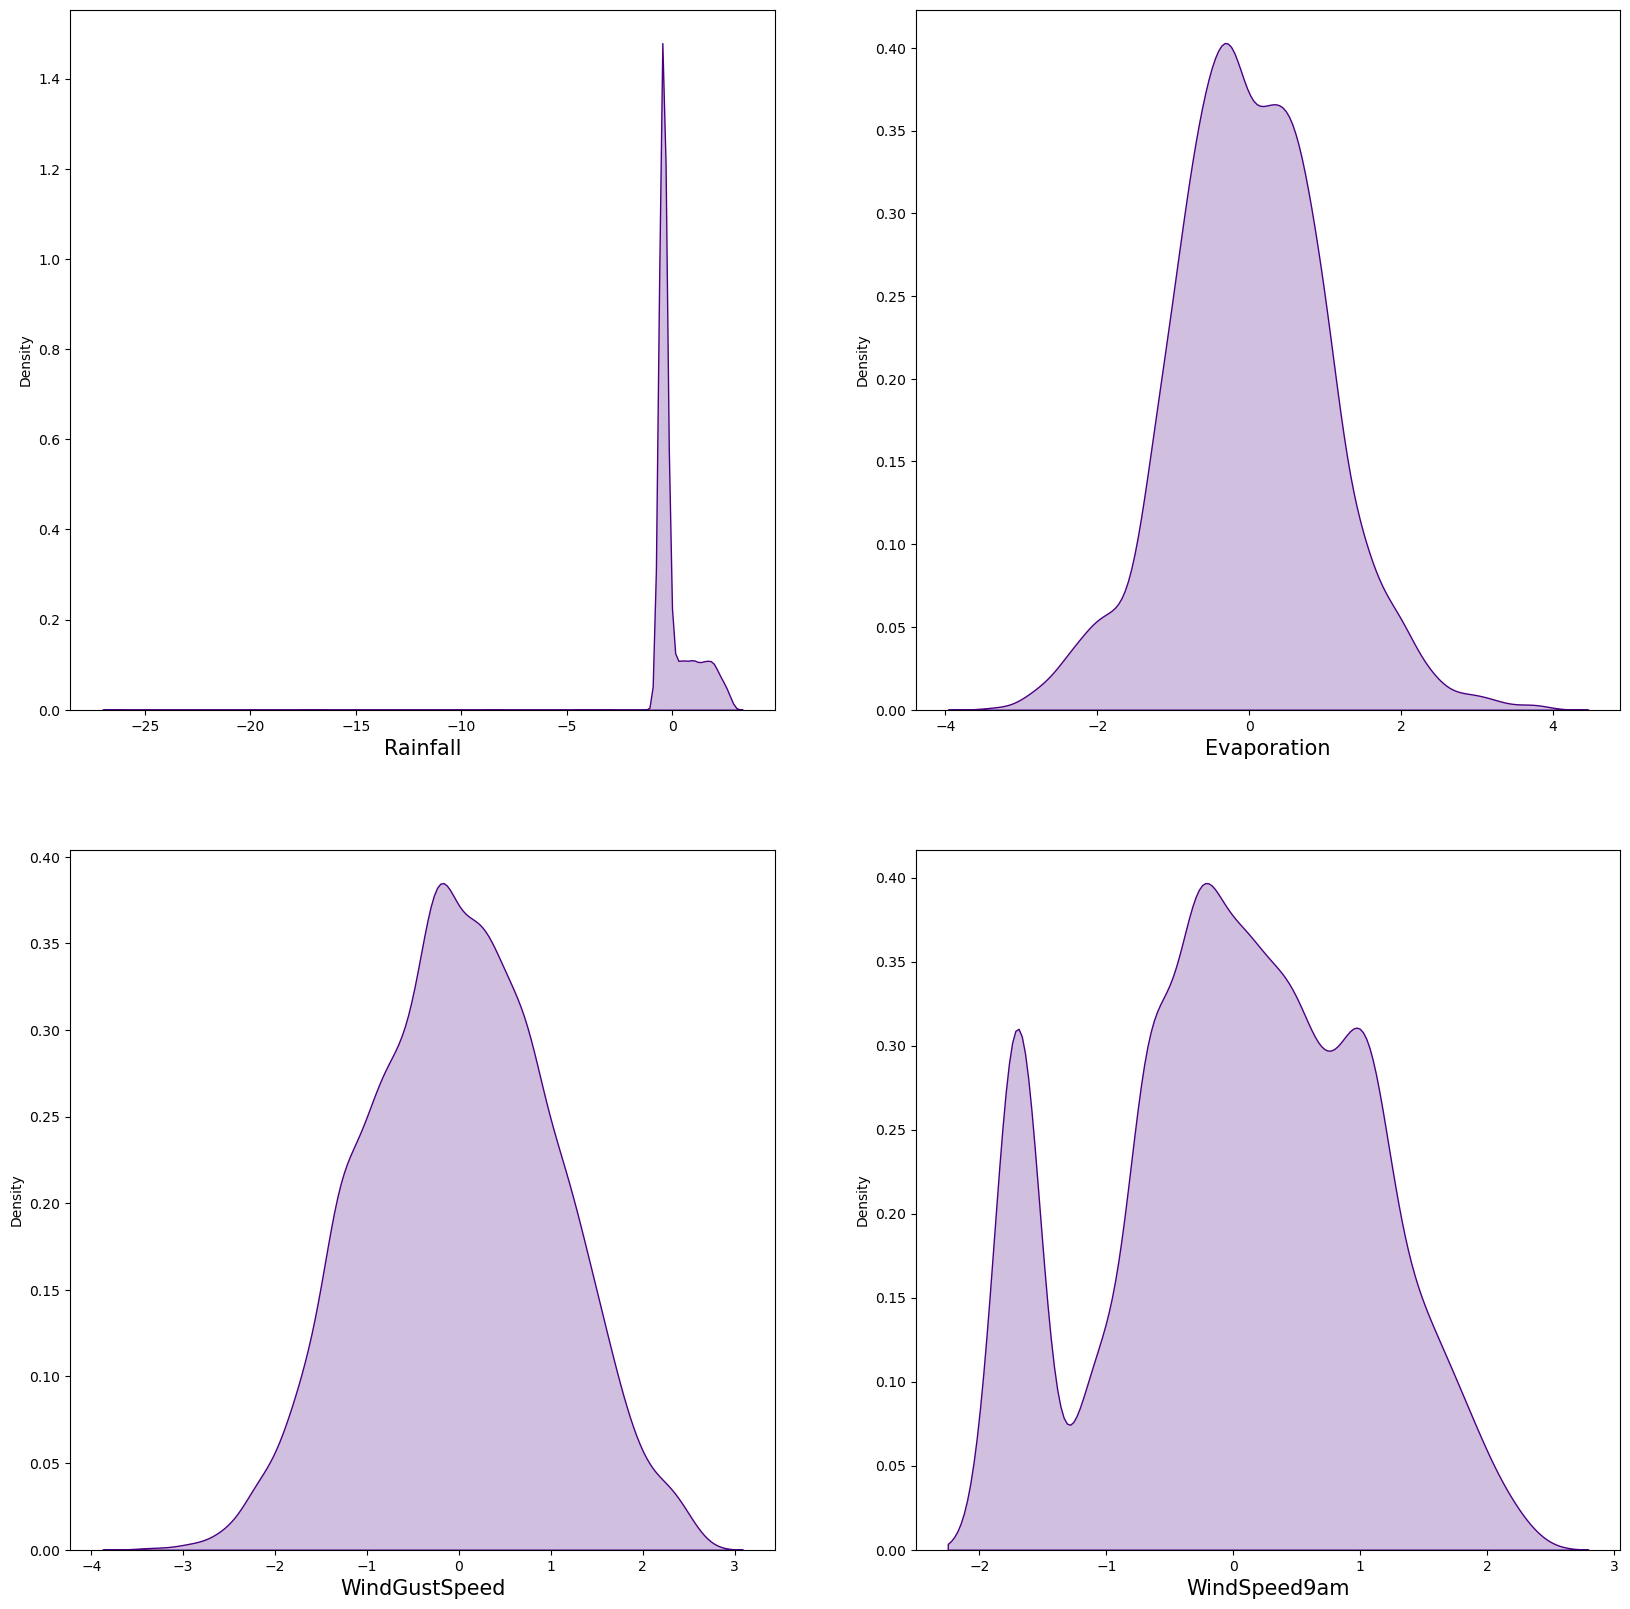

In [52]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [53]:
# Removing skewness using square root method
new_df["Rainfall"] = np.cbrt(new_df["Rainfall"])

In [54]:
new_df.skew()

MinTemp         -0.137773
MaxTemp          0.197290
Rainfall         1.096926
Evaporation      0.086263
Sunshine        -0.288996
WindGustSpeed   -0.012794
WindSpeed9am    -0.132963
WindSpeed3pm    -0.077357
Humidity9am     -0.273921
Humidity3pm      0.098996
Pressure9am     -0.109561
Pressure3pm     -0.077155
Cloud9am         0.024393
Cloud3pm         0.096084
Temp9am         -0.209469
Temp3pm          0.243698
Day              0.009663
Month            0.033661
Year             0.083311
dtype: float64

# Encoding the categorical columns using Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [56]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Location,MinTemp,MaxTemp,Rainfall,Evaporation,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
WindGustDir,1.000000,0.367967,0.393584,0.071513,0.006166,-0.147793,-0.081854,-0.069394,-0.017777,-0.046661,...,-0.111734,-0.086622,-0.052079,0.009259,-0.018267,-0.072270,-0.067763,0.000404,0.021164,-0.212247
WindDir9am,0.367967,1.000000,0.201090,0.122139,-0.007133,-0.021021,0.069061,-0.024063,0.046053,0.102758,...,-0.033417,-0.058537,-0.013349,-0.003938,0.004311,0.075152,-0.025337,-0.021223,0.017524,-0.039959
WindDir3pm,0.393584,0.201090,1.000000,0.083341,-0.017381,-0.050372,-0.143353,-0.157298,0.042125,-0.045528,...,-0.034395,-0.026644,0.030035,0.043943,0.032016,-0.164988,-0.160667,-0.001424,0.032329,-0.021169
RainToday,0.071513,0.122139,0.083341,1.000000,0.294971,0.010212,0.102598,-0.139564,0.670205,-0.057430,...,0.275839,-0.032336,0.016307,0.268806,0.240204,-0.028751,-0.143006,0.001433,-0.048330,0.018636
RainTomorrow,0.006166,-0.007133,-0.017381,0.294971,1.000000,0.012833,0.096017,-0.099118,0.240868,-0.046788,...,0.339144,-0.037336,-0.015301,0.243258,0.294422,0.004357,-0.127703,0.003060,-0.052404,0.020604
Location,-0.147793,-0.021021,-0.050372,0.010212,0.012833,1.000000,0.109190,-0.042359,0.079019,0.239948,...,0.188513,0.073166,0.086926,0.115216,0.143629,0.063952,-0.054065,-0.001757,-0.032383,0.542482
MinTemp,-0.081854,0.069061,-0.143353,0.102598,0.096017,0.109190,1.000000,0.739828,0.139570,0.601006,...,0.122702,-0.489516,-0.482624,0.156774,0.115432,0.905063,0.709154,0.022301,-0.204835,0.030889
MaxTemp,-0.069394,-0.024063,-0.157298,-0.139564,-0.099118,-0.042359,0.739828,1.000000,-0.188904,0.709351,...,-0.393091,-0.406983,-0.486397,-0.287213,-0.294340,0.860738,0.980235,0.013752,-0.128894,0.059236
Rainfall,-0.017777,0.046053,0.042125,0.670205,0.240868,0.079019,0.139570,-0.188904,1.000000,-0.112612,...,0.408603,-0.100413,-0.026077,0.405943,0.351286,-0.040751,-0.200529,-0.000003,-0.033031,0.035458
Evaporation,-0.046661,0.102758,-0.045528,-0.057430,-0.046788,0.239948,0.601006,0.709351,-0.112612,1.000000,...,-0.335572,-0.336950,-0.350884,-0.172180,-0.230072,0.692513,0.688649,0.003909,0.020956,0.378581


<Axes: >

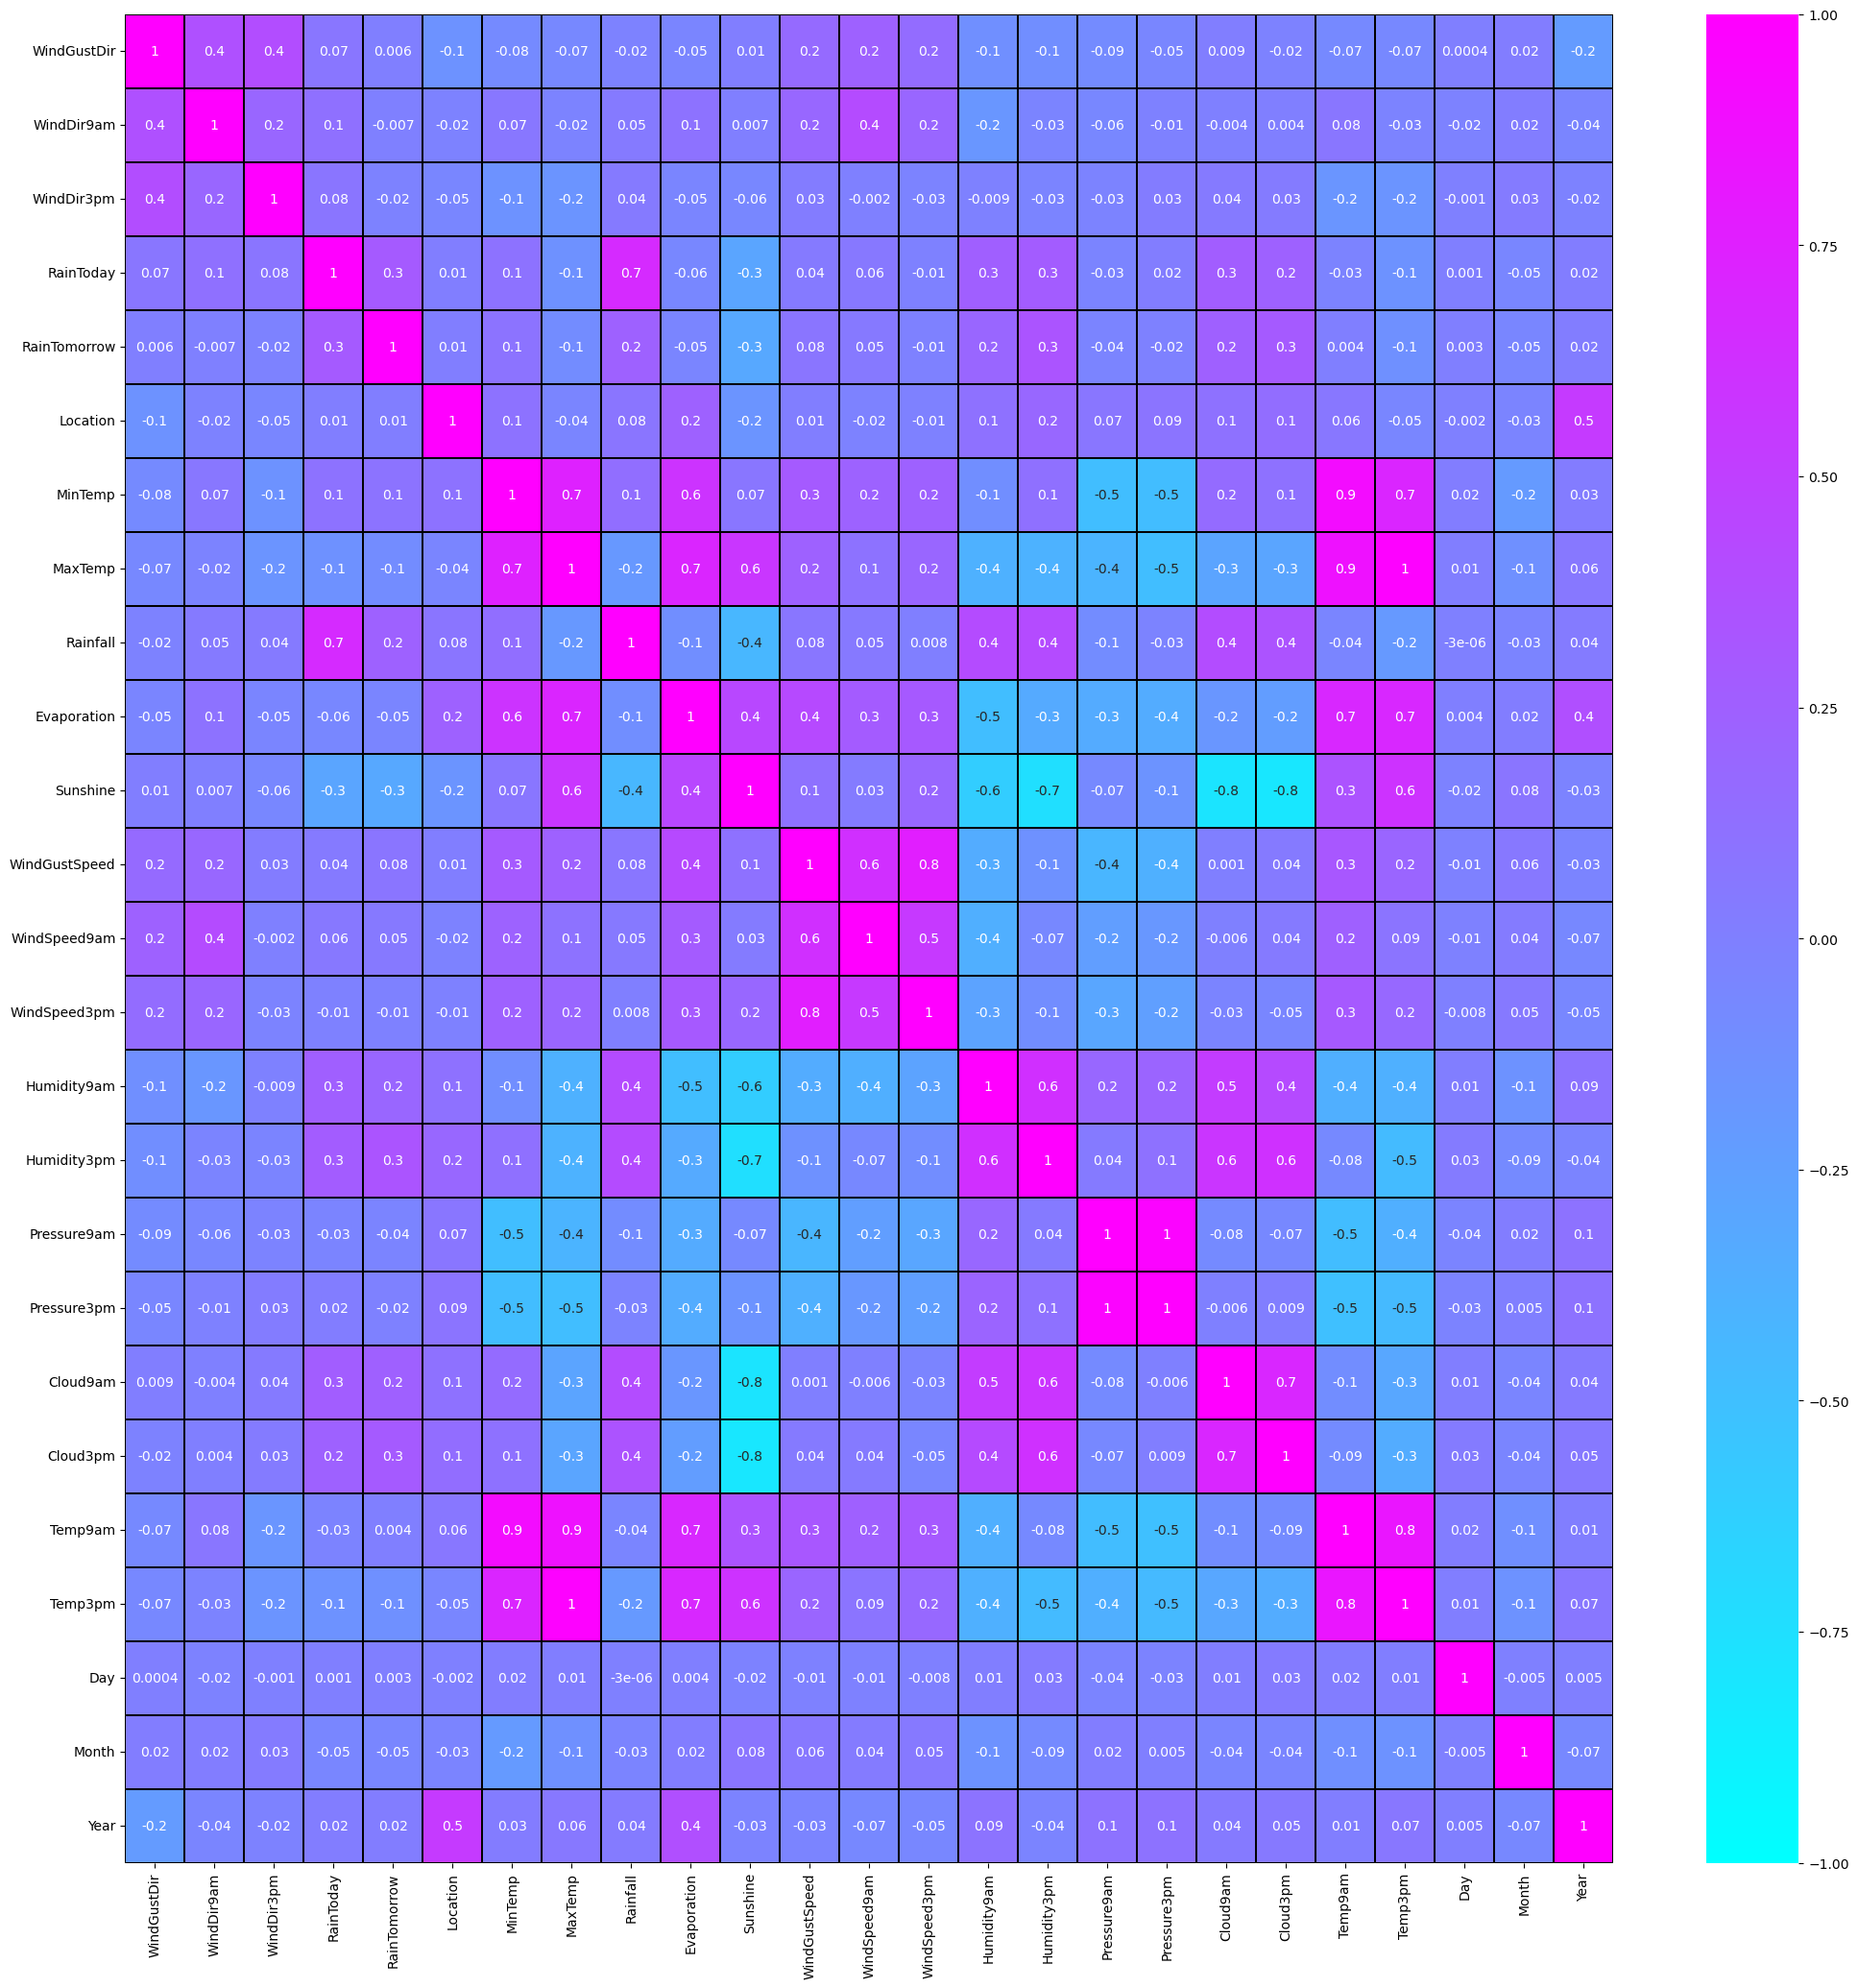

In [57]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,25))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cool")

From this we can notice some multi colinearity between some features, so we will use VIF techniques to remove highly related feature

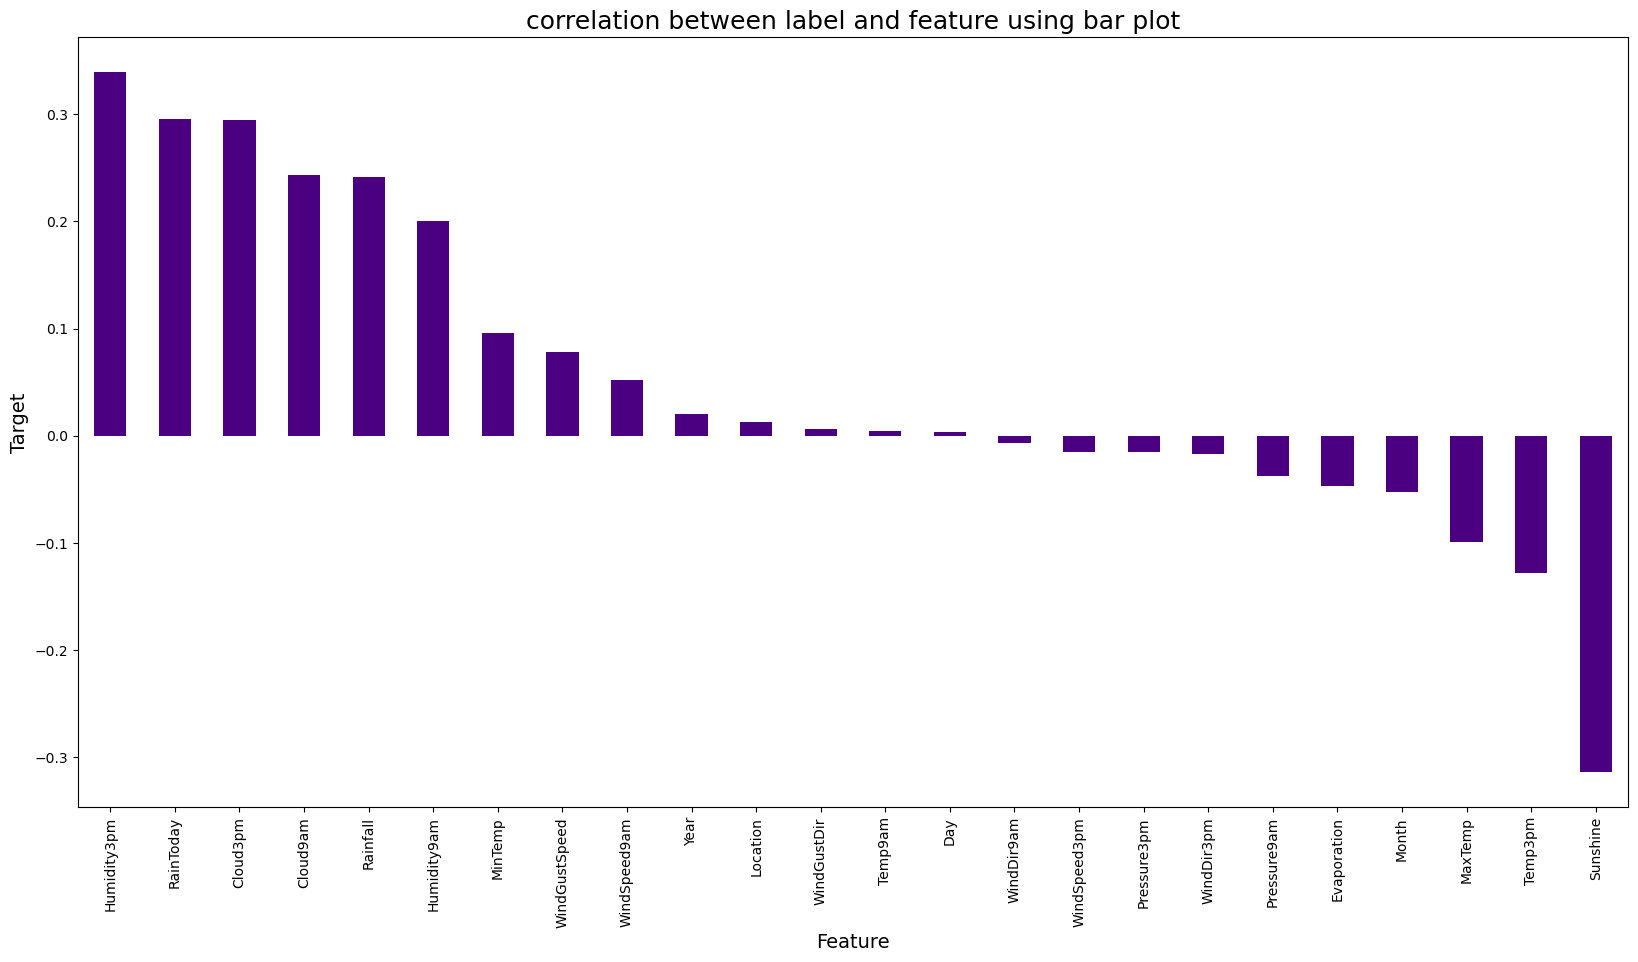

In [58]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(20,10))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

*This is for Classificaion Problem the relation between RainTomorrow as our Label, Some features does not have much relation between Label*

# Feature Scaling using Standard Scalarization

In [59]:
from sklearn.preprocessing import StandardScaler
#Separate Label and Features
x=new_df.drop('RainTomorrow',axis=1)
y=new_df.RainTomorrow
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,1.247965,1.213389,1.541063,-0.560882,-1.379334,0.048488,-0.226612,0.806117,-0.449326,-0.154832,...,-1.588149,-1.883671,-1.502182,1.479615,0.327698,-0.202854,-0.185536,-1.668284,1.667302,-1.743795
1,1.441737,-0.358897,1.779808,-0.560882,-1.379334,-1.001527,0.145232,-0.615681,-0.191372,1.435521,...,-1.426422,-1.357451,-1.375007,-1.110178,-1.049117,-0.150355,0.247241,-1.554771,1.667302,-1.743795
2,1.635509,1.213389,1.779808,-0.560882,-1.379334,-0.039013,0.246644,-0.615681,0.390325,1.260313,...,-1.156876,-1.901817,-1.211498,-0.682731,-0.828466,0.514633,0.056819,-1.441258,1.667302,-1.743795
3,-0.495982,0.314940,-1.801369,-0.560882,-1.379334,-0.686522,0.635391,-0.615681,-0.319826,1.569545,...,-1.911604,-0.087263,-0.466621,-1.348008,-1.300868,0.007143,0.628084,-1.327745,1.667302,-1.743795
4,1.247965,-1.481959,-0.130153,-0.560882,-1.379334,0.765999,1.362178,1.168404,-0.272886,-0.270022,...,-0.995149,-1.321159,-1.702027,1.102344,1.584544,-0.045357,1.182039,-1.214232,1.667302,-1.743795


# Checking Variance Inflation Factor(VIF)

In [60]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.475585,WindGustDir
1,1.404584,WindDir9am
2,1.307690,WindDir3pm
3,1.900497,RainToday
4,1.655218,Location
5,12.622109,MinTemp
6,38.589724,MaxTemp
7,2.337321,Rainfall
8,5.093665,Evaporation
9,10.512002,Sunshine


Many feature are highly multi related So we will drop Temp3pm as it have highest VIF values

In [61]:
x.drop('Temp3pm',axis=1,inplace=True)

In [62]:
#Again Check VIF score
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.475228,WindGustDir
1,1.403688,WindDir9am
2,1.307351,WindDir3pm
3,1.900250,RainToday
4,1.652686,Location
5,12.450665,MinTemp
6,13.716104,MaxTemp
7,2.337318,Rainfall
8,5.090933,Evaporation
9,10.497546,Sunshine


In [63]:
#Now we will remove Pressure3pm
x.drop('Pressure3pm',axis=1,inplace=True)

In [64]:
#Again check VIF score
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.474942,WindGustDir
1,1.403227,WindDir9am
2,1.278329,WindDir3pm
3,1.894109,RainToday
4,1.648175,Location
5,12.282022,MinTemp
6,11.836635,MaxTemp
7,2.298344,Rainfall
8,5.001804,Evaporation
9,10.119354,Sunshine


In [65]:
# Now We will remove Temp9am from our data
x.drop('Temp9am',axis=1,inplace=True)

In [66]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.474879,WindGustDir
1,1.397777,WindDir9am
2,1.275884,WindDir3pm
3,1.893722,RainToday
4,1.635427,Location
5,6.540286,MinTemp
6,8.449583,MaxTemp
7,2.295020,Rainfall
8,4.997755,Evaporation
9,9.939048,Sunshine


In [67]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [68]:
# Checking value count of target column
y.value_counts()

0    3665
1    3665
Name: RainTomorrow, dtype: int64

# Modeling

In [69]:
#Finding best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8872214643019555  on Random_state  24


In [70]:
# Creating train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [72]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)
rfc=accuracy_score(y_test, predRFC)
print(rfc)
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8808549340609367
[[971 131]
 [131 966]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1102
           1       0.88      0.88      0.88      1097

    accuracy                           0.88      2199
   macro avg       0.88      0.88      0.88      2199
weighted avg       0.88      0.88      0.88      2199



The accuracy using Random Forest Classifier is 88%

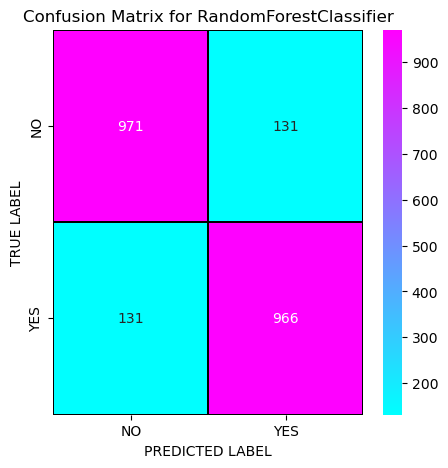

In [73]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="cool",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [74]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)
sv=accuracy_score(y_test, predsvc)
print(sv)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7989995452478399
[[874 228]
 [214 883]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1102
           1       0.79      0.80      0.80      1097

    accuracy                           0.80      2199
   macro avg       0.80      0.80      0.80      2199
weighted avg       0.80      0.80      0.80      2199



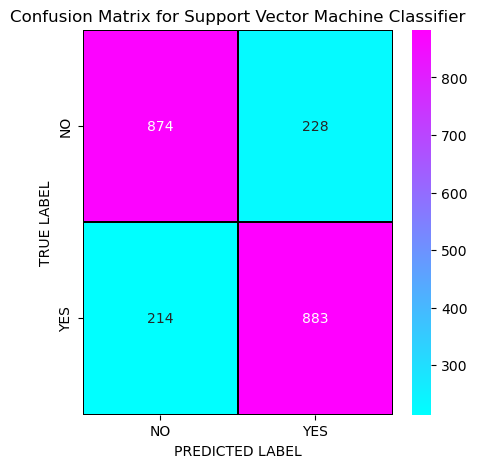

In [75]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="cool",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [76]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

gb=accuracy_score(y_test, predGB)
print(gb)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8303774442928604
[[937 165]
 [208 889]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1102
           1       0.84      0.81      0.83      1097

    accuracy                           0.83      2199
   macro avg       0.83      0.83      0.83      2199
weighted avg       0.83      0.83      0.83      2199



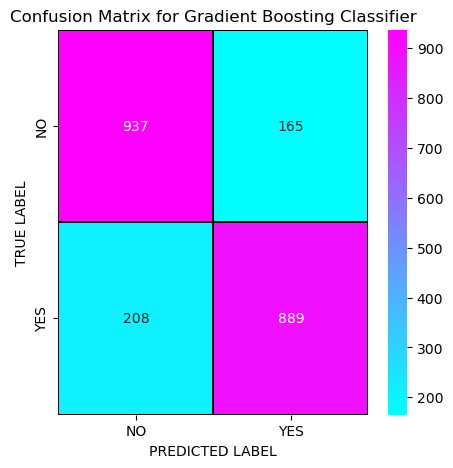

In [77]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="cool",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [78]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)

# Prediction
predBC = BC.predict(x_test)
bc=accuracy_score(y_test, predBC)
print(bc)
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test,predBC))

0.8476580263756253
[[963 139]
 [196 901]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1102
           1       0.87      0.82      0.84      1097

    accuracy                           0.85      2199
   macro avg       0.85      0.85      0.85      2199
weighted avg       0.85      0.85      0.85      2199



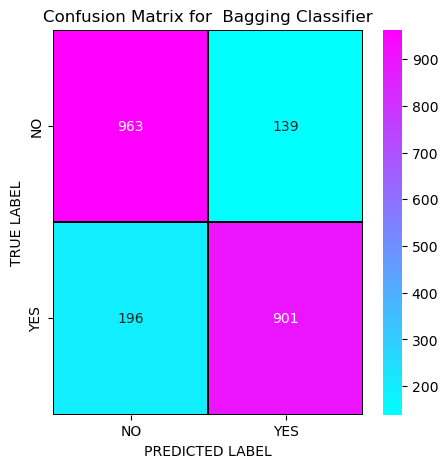

In [79]:
# Lets plot confusion matrix for  Bagging Classifier
cm = confusion_matrix(y_test,predBC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="cool",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Bagging Classifier')
plt.show()

In [80]:
# Checking accuracy for XGBClassifier
XGB = xgb(verbosity=0)
XGB.fit(x_train,y_train)

# Prediction
predXGB = XGB.predict(x_test)
xgb1=accuracy_score(y_test, predXGB)
print(xgb1)
print(confusion_matrix(y_test, predXGB))
print(classification_report(y_test,predXGB))

0.8703956343792633
[[984 118]
 [167 930]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1102
           1       0.89      0.85      0.87      1097

    accuracy                           0.87      2199
   macro avg       0.87      0.87      0.87      2199
weighted avg       0.87      0.87      0.87      2199



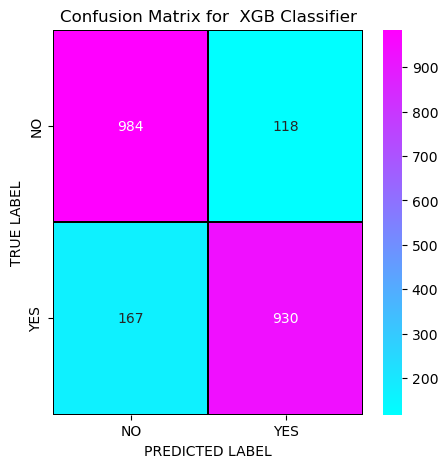

In [81]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predXGB)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="cool",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

# Checking Cross Validation Score

In [82]:
# cv score for Random Forest Classifier
rf=cross_val_score(RFC,x,y,cv=5).mean()
print(rf)

0.5869031377899045


In [83]:
# cv score for Support Vector Machine Classifier
sv_cv=cross_val_score(svc,x,y,cv=5).mean()
print(sv_cv)

0.5896316507503411


In [84]:
# cv score for Gradient Boosting Classifier
gb_cv=cross_val_score(GB,x,y,cv=5).mean()
print(gb_cv)

0.4882673942701228


In [85]:
# cv score for Bagging Classifier
bc_cv=cross_val_score(BC,x,y,cv=5).mean()
print(bc_cv)

0.5478854024556616


In [86]:
# cv score for XGB Classifier
xgb_cv=cross_val_score(XGB,x,y,cv=5).mean()
print(xgb_cv)

0.48049113233287866


In [88]:
model_list=['Random Forest Classifier','Support Vector Machine Classifier','Gradient Boosting Classifier','Bagging Classifier','XGB Classifier'

SyntaxError: incomplete input (2809007777.py, line 1)

In [89]:
accuracyscore=[rfc,sv,gb,bc,xgb1]
crossval=[rf,sv_cv,gb_cv,bc_cv,xgb_cv]

In [90]:
score_diff=[]
for i in range(len(accuracyscore)):
    score_diff.append(accuracyscore[i]-crossval[i])

In [91]:
models=pd.DataFrame({})
models["Classifier"]=model_list#
models["Accuracy_score"]=accuracyscore
models["Cross Validation_Score"]=crossval
models["Differance"]=score_diff
models

NameError: name 'model_list' is not defined

Support Vector Machine is the best model and has least differance value, so let us proceed

# Plotting ROC and compare AUC for all the models

In [92]:
# Plotting for all the models 
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp=plot_roc_curve(svc, x_test, y_test)   # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)

plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Sambhaji\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

# Hyper Parameter Tuning

In [93]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

In [94]:
params={'C':[1,0.5,1.5],
       'kernel' : ['linear', 'poly', 'rbf'],
        'gamma' : ['scale', 'auto'],
        'random_state':[100,200,150,250]}
GCV=GridSearchCV(SVC(),params,cv=3)

In [95]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 0.5, 1.5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [100, 200, 150, 250]})

In [97]:
GCV.best_params_

{'C': 1.5, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 100}

These are the best parameters values that we have got for SVC

In [98]:
FinalModel = SVC(C= 1.5, gamma='scale', kernel= 'rbf', random_state=100)
FinalModel.fit(x_train, y_train)
pred = FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.99090495679854


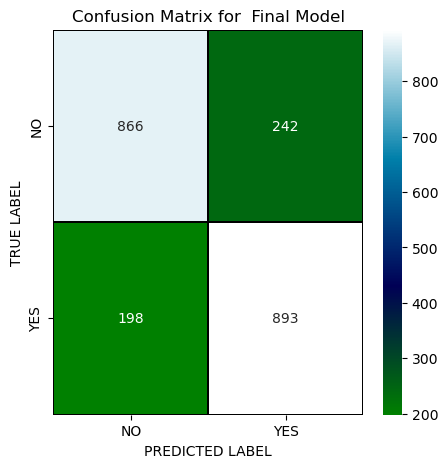

In [99]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

In [100]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(FinalModel, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

NameError: name 'plot_roc_curve' is not defined

In [101]:
# Saving the model using .pkl
import joblib
joblib.dump(FinalModel,"RainClassification.pkl")

['RainClassification.pkl']

In [102]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("RainClassification.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 0, 1])

In [103]:
a=np.array(y_test)
Class_Result=pd.DataFrame({'Original':a,'Prediction':prediction})
Class_Result

,Original,Prediction
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
2194,1,1
2195,0,0
2196,1,1
2197,0,0


So we predicted RainTomorrow with our model, and Model Accuracy is 80%

Now let us predict the Rainfall from our data using Regression Model

<Axes: >

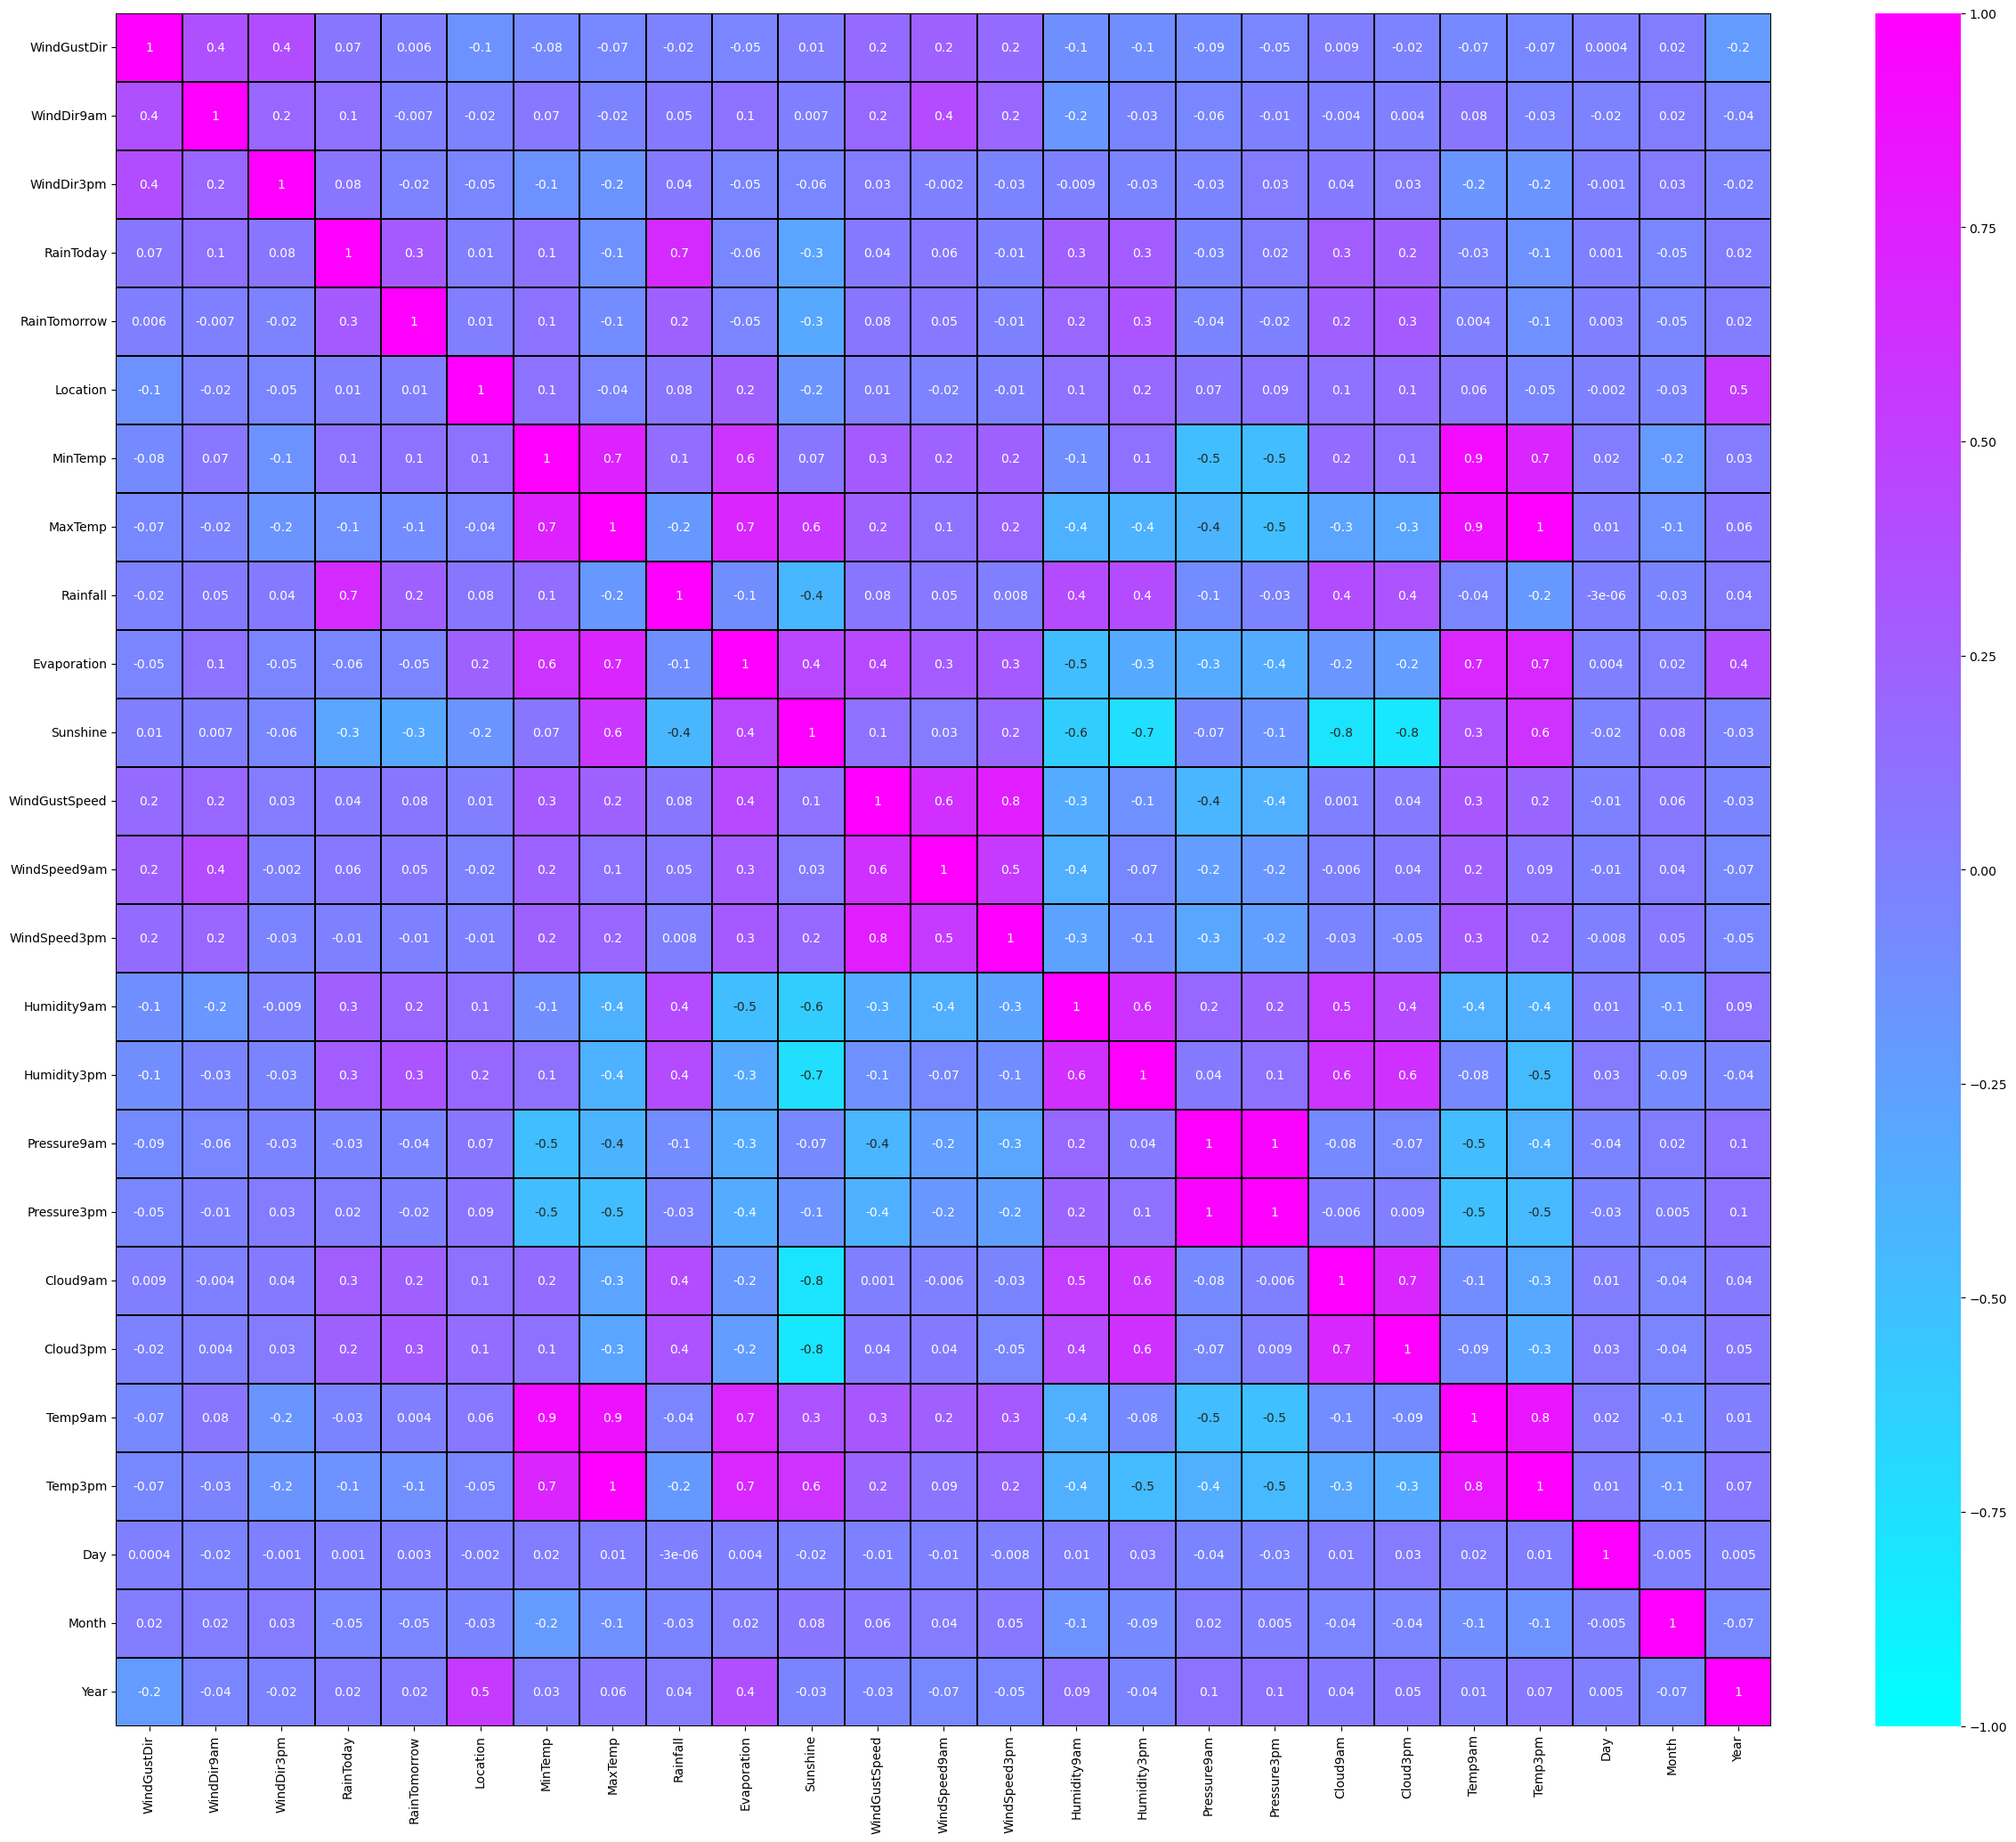

In [104]:
#Finding relation ith Rainfall
plt.figure(figsize=(30,25))
sns.heatmap(cor,linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cool")

This gives Corelation with features and Labels, Now letuse check relation with Rainfall

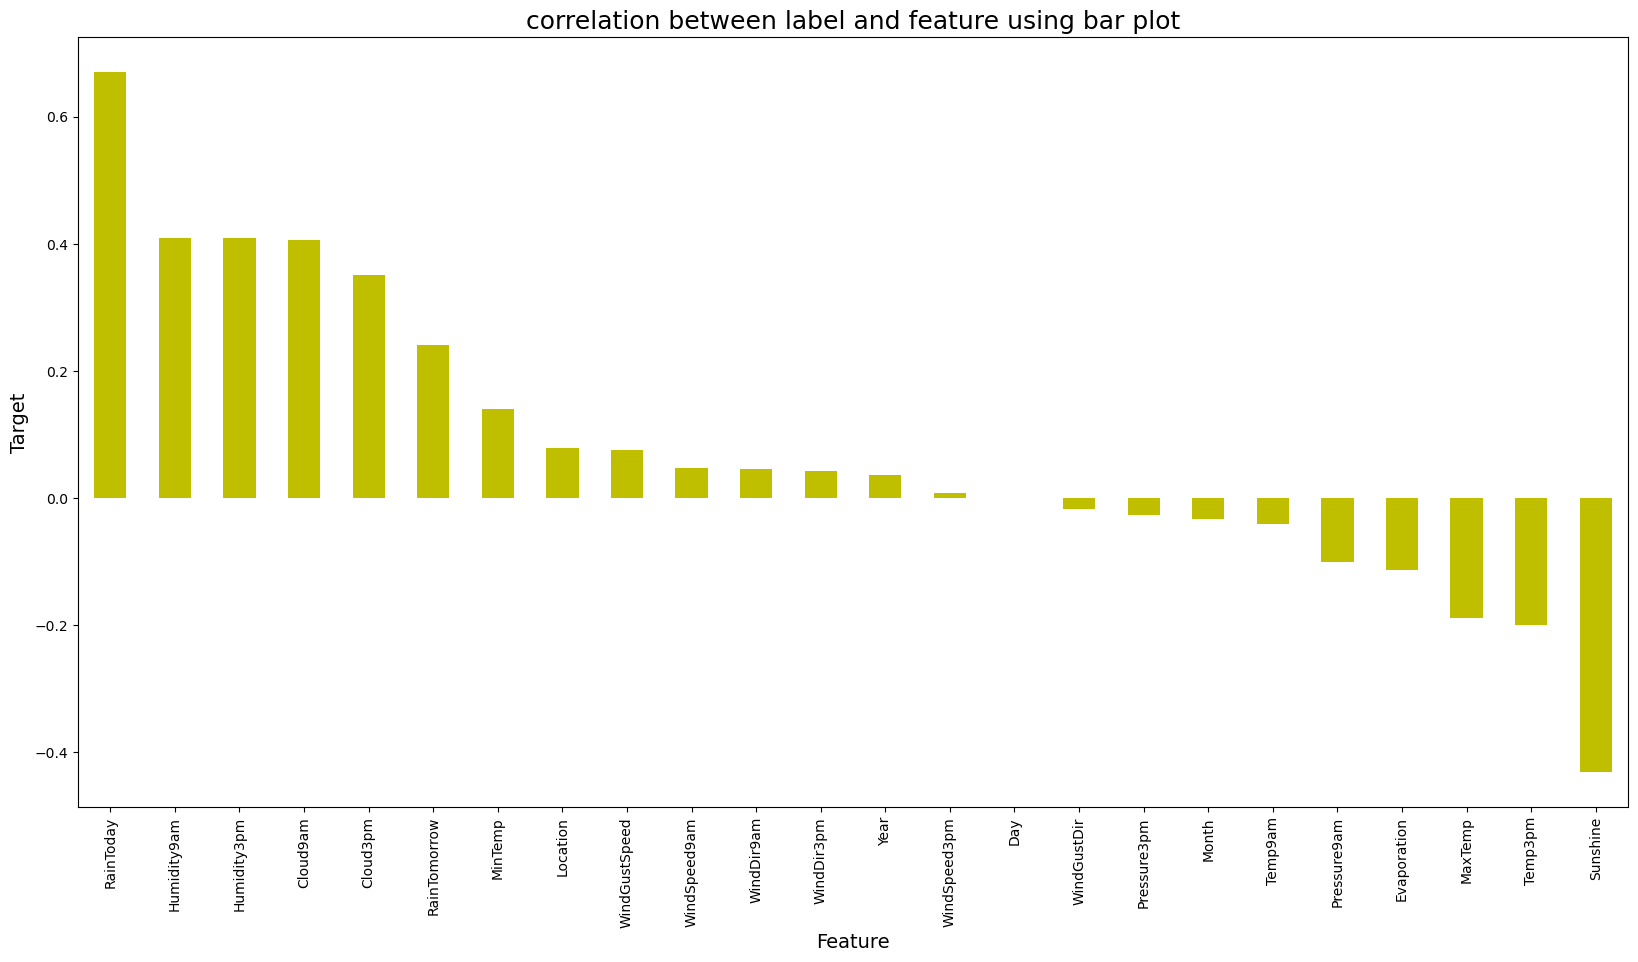

In [105]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(20,10))
new_df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

*Almost all features have relation between Label, But only WindSpeed3pm does not have much relation*

In [106]:
#Separating the features and label variables into x and y

x = new_df.drop("Rainfall", axis=1)
y = new_df["Rainfall"]

# Feature Scaling using Standard Scalarization

In [107]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Location,MinTemp,MaxTemp,Evaporation,Sunshine,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,1.247965,1.213389,1.541063,-0.560882,-0.565975,-1.379334,0.048488,-0.226612,-0.449326,-0.154832,...,-1.588149,-1.883671,-1.502182,1.479615,0.327698,-0.202854,-0.185536,-1.668284,1.667302,-1.743795
1,1.441737,-0.358897,1.779808,-0.560882,-0.565975,-1.379334,-1.001527,0.145232,-0.191372,1.435521,...,-1.426422,-1.357451,-1.375007,-1.110178,-1.049117,-0.150355,0.247241,-1.554771,1.667302,-1.743795
2,1.635509,1.213389,1.779808,-0.560882,-0.565975,-1.379334,-0.039013,0.246644,0.390325,1.260313,...,-1.156876,-1.901817,-1.211498,-0.682731,-0.828466,0.514633,0.056819,-1.441258,1.667302,-1.743795
3,-0.495982,0.314940,-1.801369,-0.560882,-0.565975,-1.379334,-0.686522,0.635391,-0.319826,1.569545,...,-1.911604,-0.087263,-0.466621,-1.348008,-1.300868,0.007143,0.628084,-1.327745,1.667302,-1.743795
4,1.247965,-1.481959,-0.130153,-0.560882,-0.565975,-1.379334,0.765999,1.362178,-0.272886,-0.270022,...,-0.995149,-1.321159,-1.702027,1.102344,1.584544,-0.045357,1.182039,-1.214232,1.667302,-1.743795


In [108]:
#Checking Variance Inflation Factor(VIF)

# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif
1
# Finding varience inflation factor in each scaled column i.

1

In [109]:
#Let us remove Temp3pm
x.drop('Temp3pm',axis=1,inplace=True)

In [110]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.471769,WindGustDir
1,1.405986,WindDir9am
2,1.309222,WindDir3pm
3,1.259898,RainToday
4,1.252052,RainTomorrow
5,1.665915,Location
6,12.426289,MinTemp
7,13.696958,MaxTemp
8,5.090762,Evaporation
9,10.495494,Sunshine


In [111]:
x.drop('Temp9am',axis=1,inplace=True)

In [112]:
vif = pd.DataFrame()#Again check the value of VIF
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.471658,WindGustDir
1,1.400894,WindDir9am
2,1.305669,WindDir3pm
3,1.259724,RainToday
4,1.251821,RainTomorrow
5,1.652572,Location
6,6.784112,MinTemp
7,10.048678,MaxTemp
8,5.084177,Evaporation
9,10.348746,Sunshine


In [113]:
x.drop('Pressure3pm',axis=1,inplace=True)# Droping Pressure3pm

In [114]:
vif = pd.DataFrame()#Again check the value of VIF
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.471599,WindGustDir
1,1.400403,WindDir9am
2,1.278061,WindDir3pm
3,1.258340,RainToday
4,1.250531,RainTomorrow
5,1.648729,Location
6,6.453127,MinTemp
7,8.383874,MaxTemp
8,4.999981,Evaporation
9,9.967566,Sunshine


All features VIF values are below 10, So we can proceed

# Modeling

In [33]:
#Finding best random state
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFG = RandomForestRegressor()
    RFG.fit(x_train, y_train)
    pred = RFG.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

NameError: name 'x' is not defined

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))
# Checking cv score 
print(cross_val_score(RFR,x,y,cv=5).mean())

In [ ]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))
# Checking cv score 
print(cross_val_score(knn,x,y,cv=5).mean())

In [ ]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
# Checking cv score 

print(cross_val_score(GB,x,y,cv=5).mean())

In [ ]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))
# Checking cv score
print(cross_val_score(BR,x,y,cv=5).mean())

In [ ]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))
# Checking cv score
print(cross_val_score(BR,x,y,cv=5).mean())

In [ ]:
From this we can AdaboostRegressor as our Best Algorithm as leaset differance between r2 score and CVR score

# Hyper parameter tuning

In [ ]:
parameter={'n_estimators':[1,3,4,5],
          'learning_rate':[.1,1,.3,.5],
          'loss' : ['linear', 'square', 'exponential'],
          'random_state':[100,150,200,250]}

In [ ]:
GCV=GridSearchCV(AdaBoostRegressor(),parameter,cv=4)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Rainfall_model = AdaBoostRegressor(learning_rate= 1, loss= 'exponential',n_estimators= 3,random_state=100)
Rainfall_model.fit(x_train, y_train)
pred = Rainfall_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))
print('R2_Score:',r2_score(y_test,pred)*100)

In [ ]:
So our accuracy of our Final Regressor model increased to 63.53%

# Saving the model

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(Rainfall_model,"RainfallRegressor.pkl")

In [ ]:
# Loading the saved model
model=joblib.load("RainfallRegressor.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

In [ ]:
#Plot the result

plt.figure(figsize=(10,10))
sns.regplot(y_test,prediction,color='g')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Regressor")
plt.show()